In [1]:
import pandas as pd
import sys
sys.path.append("../core/")
from experiments import run
from pathlib import Path 

In [2]:
data_package =r'C:\Users\User\Documents\Skolkovo\projects\Sharjah\Schizophrenia Excel files'

In [3]:
files =list(Path(data_package).iterdir())

In [4]:
def prepare_dataset(filepath):
    data=pd.read_excel(filepath)
    data =data.T
    data =data.reset_index()
    data.columns = data.iloc[0]
    data =data[2:]
    data['target'] =data['NAME'].apply(lambda x: x.split("_")[0])
    data['target']= data['target'].map({'Schizo1':1, 'Ctrl1': 0})
    print(data.select_dtypes(include=['object']))
    y =data['target']
    X=data.iloc[:, 1:-1].astype(float)
    return X,y

In [5]:
X,y=prepare_dataset(files[0])

0                NAME      HTR4      HTR6      HTR7   LURAP1L        BBX  \
2   Schizo1_GSM677118  5.727914   3.49068  3.680865  2.199321  10.761437   
3   Schizo1_GSM677119  5.724901   3.49068  3.024656  2.199321   10.63498   
4   Schizo1_GSM677120  6.239469   3.49068  3.505588  2.199321  10.483729   
5   Schizo1_GSM677121  5.711125   3.48934  3.267655  2.199321  10.919826   
6   Schizo1_GSM677122  5.100501  3.564864  3.024656  2.199321  10.549424   
..                ...       ...       ...       ...       ...        ...   
69    Ctrl1_GSM677178  5.681799   3.49068  3.024656   2.20113  11.646984   
70    Ctrl1_GSM677179  5.730127   3.48934  3.024656  2.199321  11.536132   
71    Ctrl1_GSM677180  5.681799   3.49068  3.024656  2.232711   11.53018   
72    Ctrl1_GSM677181  5.707998  3.474379  3.024656  2.199321  11.358487   
73    Ctrl1_GSM677182  5.730127   3.49068  3.024656  2.199321  11.129184   

0  EXOC3-AS1      GSTK1    WDR83OS      DHDH  ...    ZNF185    ZNF184  \
2   2.774651  

0                NAME      HTR4      HTR6      HTR7        BBX EXOC3-AS1  \
2   Schizo1_GSM677118  5.727914   3.49068  3.680865  10.761437  2.774651   
3   Schizo1_GSM677119  5.724901   3.49068  3.024656   10.63498  3.110821   
4   Schizo1_GSM677120  6.239469   3.49068  3.505588  10.483729  2.776102   
5   Schizo1_GSM677121  5.711125   3.48934  3.267655  10.919826  2.782354   
6   Schizo1_GSM677122  5.100501  3.564864  3.024656  10.549424  2.983148   
..                ...       ...       ...       ...        ...       ...   
69    Ctrl1_GSM677178  5.681799   3.49068  3.024656  11.646984   3.40339   
70    Ctrl1_GSM677179  5.730127   3.48934  3.024656  11.536132  2.743372   
71    Ctrl1_GSM677180  5.681799   3.49068  3.024656   11.53018  2.979557   
72    Ctrl1_GSM677181  5.707998  3.474379  3.024656  11.358487  2.782354   
73    Ctrl1_GSM677182  5.730127   3.49068  3.024656  11.129184  2.782354   

0      GSTK1      DHDH    INSYN1       BCR  ... C2orf49-DT      STN1  \
2   8.679802  2

ROC AUC 10 folds: 0.8883333333333333 +- 0.1416274455511125 std
Accuracy 10 folds: 0.8482142857142858 +- 0.09624652127294189 std
F1 10 folds: 0.8378751803751804 +- 0.10667891943310347 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_sto

ROC AUC 10 folds: 0.7166666666666666 +- 0.1648231375343482 std
Accuracy 10 folds: 0.6678571428571428 +- 0.1417816660091372 std
F1 10 folds: 0.6642857142857143 +- 0.1427987093897426 std
__________________________________________________________________________
model_name svm, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model', SVC())])
ROC AUC 10 folds: 0.7166666666666666 +- 0.1648231375343482 std
Accuracy 10 folds: 0.6553571428571427 +- 0.12778779044867747 std
F1 10 folds: 0.6503174603174602 +- 0.12773522903927992 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model', Rand

ROC AUC 10 folds: 0.8066666666666666 +- 0.1943936441576444 std
Accuracy 10 folds: 0.7035714285714285 +- 0.22477312825085088 std
F1 10 folds: 0.6927777777777777 +- 0.2372089854889022 std
__________________________________________________________________________


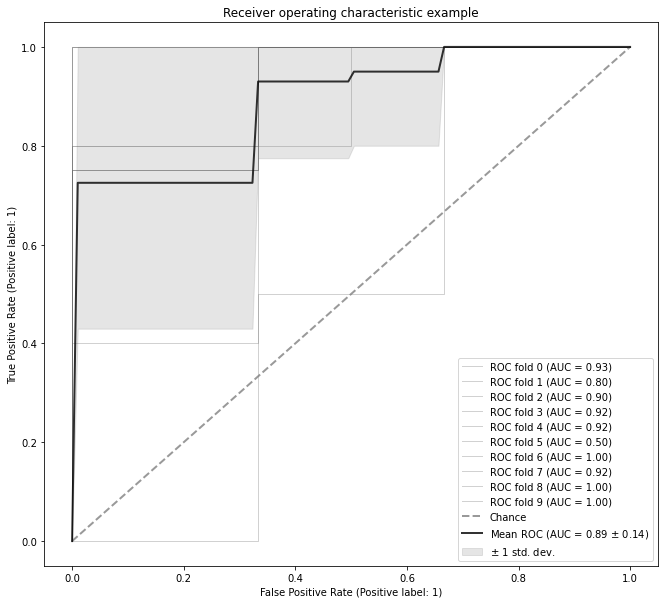

--------------------
______________stats___________________
CTPS1
Test normality:  1.4781085155846085e-05 0.01896507665514946
Patient:  6.585275395348838
Control:  6.814202134482759
Test homogenius: LeveneResult(statistic=0.12845535878253056, pvalue=0.721117621345902)
MannwhitneyuResult(statistic=233.0, pvalue=5.302637054895882e-06)


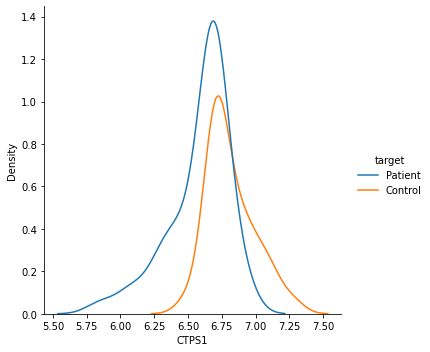

ZNF830
Test normality:  0.835607647895813 0.8065979480743408
Patient:  9.502872511627906
Control:  9.73282948275862
MannwhitneyuResult(statistic=290.0, pvalue=0.0001316688318175061)


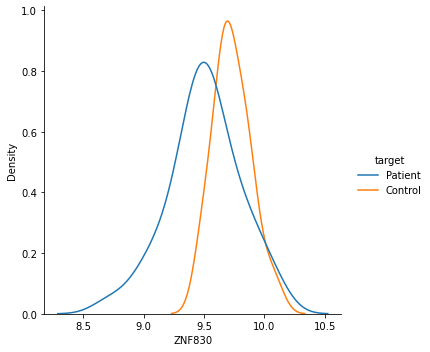

B3GNT5
Test normality:  0.26599445939064026 0.09461962431669235
Patient:  7.068652541860464
Control:  6.5490593241379305
MannwhitneyuResult(statistic=900.0, pvalue=0.0015303042493386408)


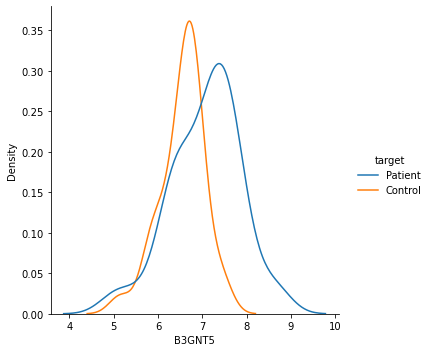

TBX21
Test normality:  0.14606086909770966 0.919567883014679
Patient:  9.48527853023256
Control:  10.124511379310343
MannwhitneyuResult(statistic=299.0, pvalue=0.0001992360445927979)


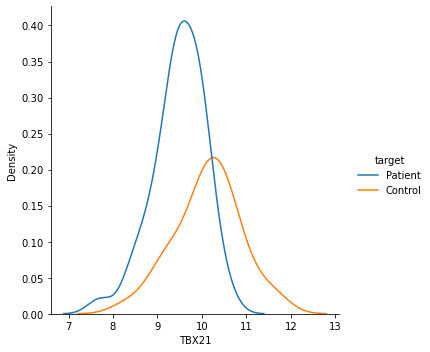

ZNF335
Test normality:  0.2784305512905121 0.3686981499195099
Patient:  7.92274846744186
Control:  8.095153989655174
MannwhitneyuResult(statistic=305.0, pvalue=0.00026112502405719115)


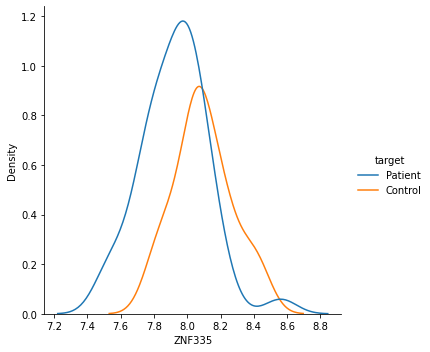

RRP8
Test normality:  0.00033163573243655264 0.4513998329639435
Patient:  7.47975699767442
Control:  7.699038851724137
MannwhitneyuResult(statistic=247.0, pvalue=1.581516099987377e-05)


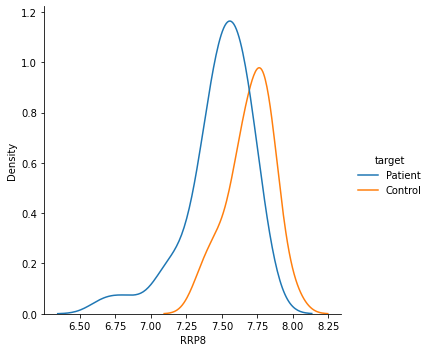

RAP1GAP2
Test normality:  0.0014935627114027739 0.7809424996376038
Patient:  9.821362290697676
Control:  10.076804948275862
MannwhitneyuResult(statistic=325.0, pvalue=0.0006222153108662636)


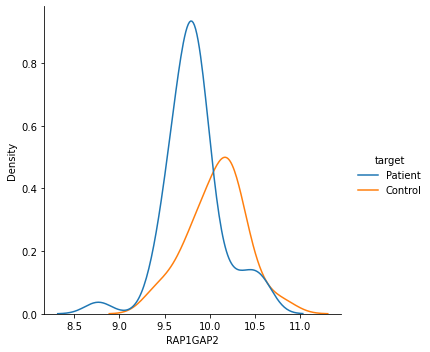

TTC16
Test normality:  0.19071874022483826 0.022305378690361977
Patient:  6.640251581395349
Control:  7.110207748275862
MannwhitneyuResult(statistic=392.0, pvalue=0.007986576614144682)


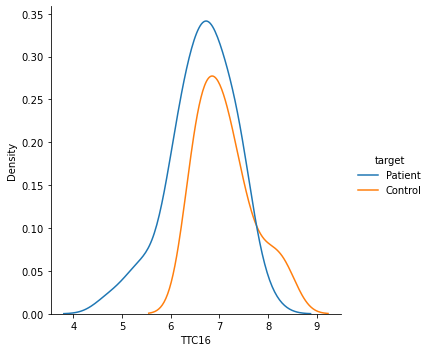

PLEKHF1
Test normality:  0.0031620769295841455 0.7061179280281067
Patient:  8.171204067441861
Control:  8.885316672413792
MannwhitneyuResult(statistic=283.0, pvalue=9.473865766385015e-05)


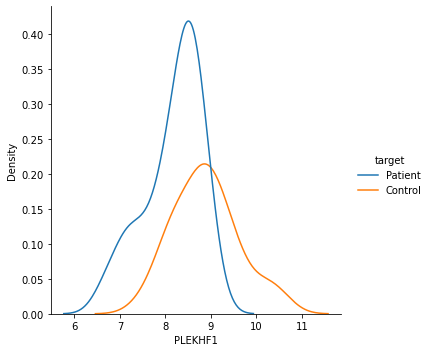

CASP10
Test normality:  0.26364800333976746 0.3853490650653839
Patient:  7.114453779069768
Control:  7.417712931034483
MannwhitneyuResult(statistic=258.0, pvalue=2.7806844521296693e-05)


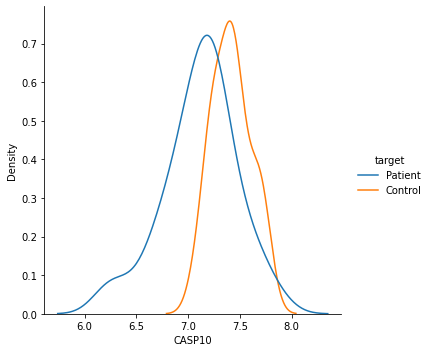

TSTD2
Test normality:  0.012444516643881798 0.6461266875267029
Patient:  7.982990393023256
Control:  8.244464413793104
MannwhitneyuResult(statistic=229.0, pvalue=6.077265350926953e-06)


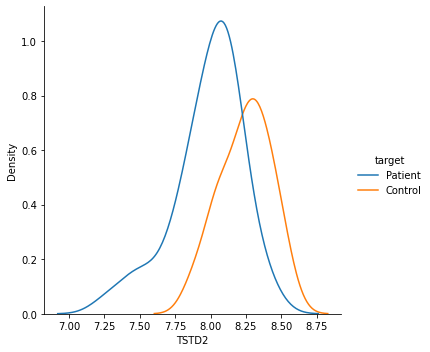

CCDC92
Test normality:  0.8793482184410095 0.791487991809845
Patient:  10.007743116279071
Control:  10.250854551724137
MannwhitneyuResult(statistic=278.0, pvalue=7.460740191895763e-05)


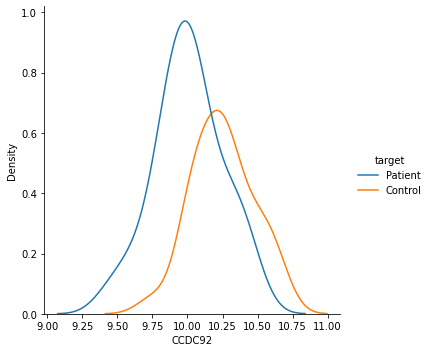

AMFR
Test normality:  0.0005667588557116687 0.007788535673171282
Patient:  7.7521603790697675
Control:  7.568553534482758
Test homogenius: LeveneResult(statistic=0.5253805673890002, pvalue=0.470971455542997)
MannwhitneyuResult(statistic=677.5, pvalue=0.5390001713293588)


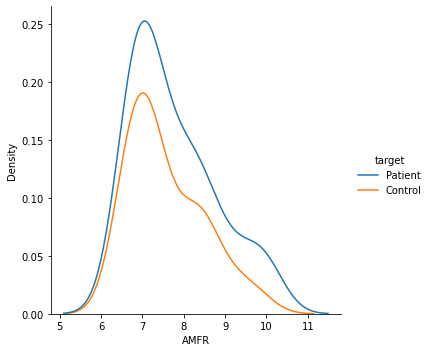

OSER1
Test normality:  0.5595800876617432 0.9714510440826416
Patient:  9.549256069767441
Control:  9.373682068965516
MannwhitneyuResult(statistic=918.0, pvalue=0.0007367090303899607)


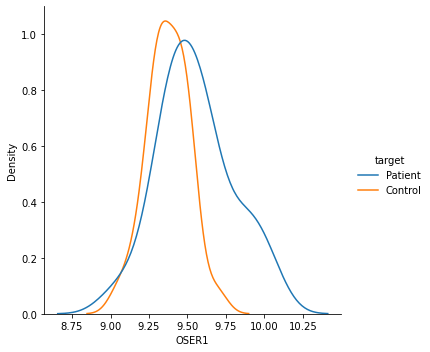

FNBP1
Test normality:  0.12870189547538757 0.08079209923744202
Patient:  7.373679427906977
Control:  7.580257734482759
MannwhitneyuResult(statistic=438.0, pvalue=0.03365904242591814)


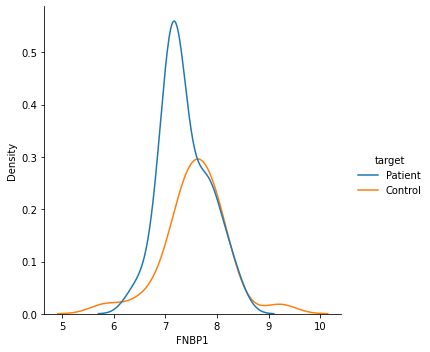

UBXN8
Test normality:  0.24065132439136505 0.13209033012390137
Patient:  7.700254995348836
Control:  7.888088413793104
MannwhitneyuResult(statistic=276.0, pvalue=6.720241401536919e-05)


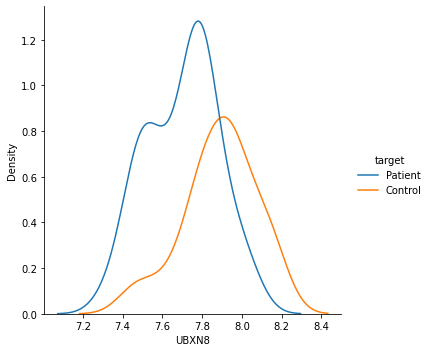

PLA2G4A
Test normality:  0.005545239429920912 0.5476880073547363
Patient:  7.13816658372093
Control:  7.425282855172414
MannwhitneyuResult(statistic=515.0, pvalue=0.21497009340528261)


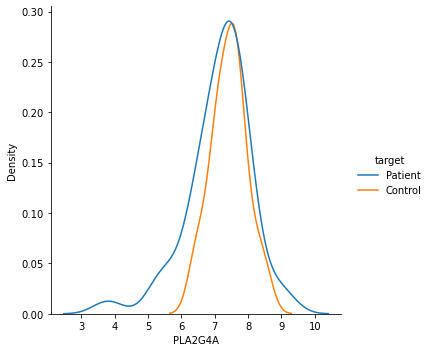

RNF185
Test normality:  0.08080572634935379 0.7556723952293396
Patient:  7.656569600000001
Control:  7.787718731034483
MannwhitneyuResult(statistic=383.0, pvalue=0.005859478453167126)


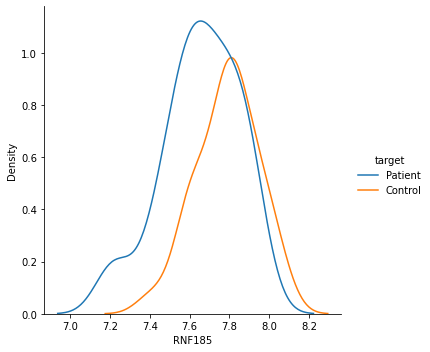

CANT1
Test normality:  0.4475442171096802 0.8432221412658691
Patient:  9.726124953488371
Control:  9.884360982758622
MannwhitneyuResult(statistic=345.0, pvalue=0.0014137088122391438)


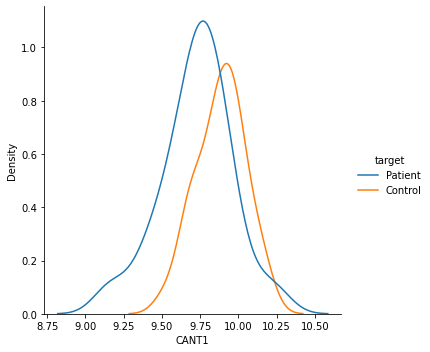

ZNF518A
Test normality:  0.8348209857940674 0.27244600653648376
Patient:  9.051363744186046
Control:  8.950479137931035
MannwhitneyuResult(statistic=770.0, pvalue=0.09368165374549986)


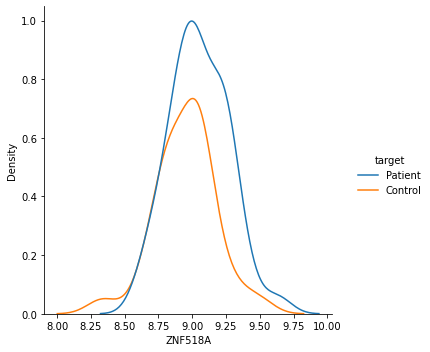

_______________________________________________
0                NAME   PGLYRP2      TFRC ST3GAL1-DT    PTPDC1      HTR7  \
2   Schizo1_GSM677118  2.199321  3.462944   4.181749  2.879901  3.680865   
3   Schizo1_GSM677119  2.199321  2.965016   4.393393   3.18815  3.024656   
4   Schizo1_GSM677120  2.530541  2.715728   5.419617  2.622791  3.505588   
5   Schizo1_GSM677121  2.199321  3.235538   4.719289  3.118487  3.267655   
6   Schizo1_GSM677122  2.199321  2.266139    4.79121  2.787313  3.024656   
..                ...       ...       ...        ...       ...       ...   
69    Ctrl1_GSM677178  2.199321  3.213423   4.073569  3.472661  3.024656   
70    Ctrl1_GSM677179  2.199321  2.203011   4.190807  3.413441  3.024656   
71    Ctrl1_GSM677180  2.199321  2.203011   4.665156  3.675015  3.024656   
72    Ctrl1_GSM677181  2.199321  2.203011   4.181749    3.1148  3.024656   
73    Ctrl1_GSM677182  2.199321  2.203011   4.299983  2.867506  3.024656   

0      EPSTI1 LINC02712   PGLYRP1    PR

ROC AUC 10 folds: 0.78 +- 0.2016322284644882 std
Accuracy 10 folds: 0.7517857142857143 +- 0.16139735791783316 std
F1 10 folds: 0.7283874458874459 +- 0.1915523681177403 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=No

ROC AUC 10 folds: 0.7283333333333333 +- 0.1462589028629255 std
Accuracy 10 folds: 0.6375 +- 0.1322031715634257 std
F1 10 folds: 0.6200793650793651 +- 0.1349785356619459 std
__________________________________________________________________________
model_name svm, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model', SVC())])
ROC AUC 10 folds: 0.7550000000000001 +- 0.1523975065412817 std
Accuracy 10 folds: 0.6803571428571428 +- 0.12688627802493227 std
F1 10 folds: 0.6725 +- 0.129491253348933 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model', RandomForestClassifier())])
RO

ROC AUC 10 folds: 0.7983333333333335 +- 0.19485749778862615 std
Accuracy 10 folds: 0.7035714285714285 +- 0.22477312825085088 std
F1 10 folds: 0.6927777777777777 +- 0.2372089854889022 std
__________________________________________________________________________


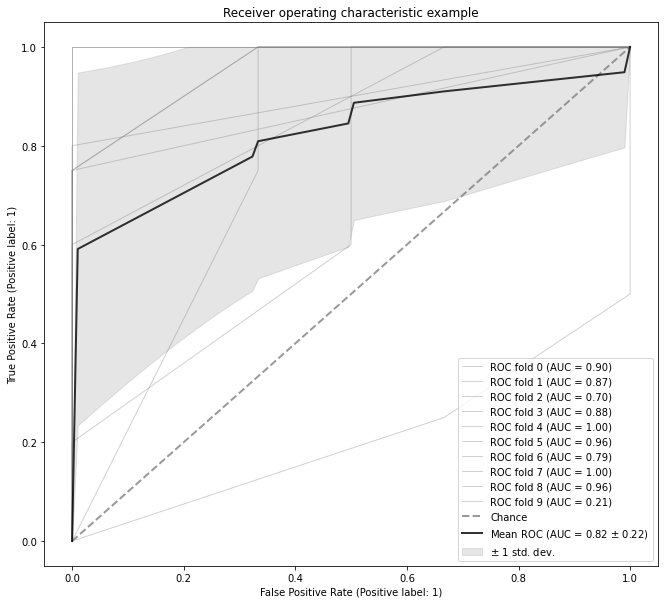

--------------------
______________stats___________________
TNFSF14
Test normality:  0.0030921208672225475 0.10533653199672699
Patient:  6.252117809302326
Control:  7.030125206896551
MannwhitneyuResult(statistic=305.5, pvalue=0.00026699366385399113)


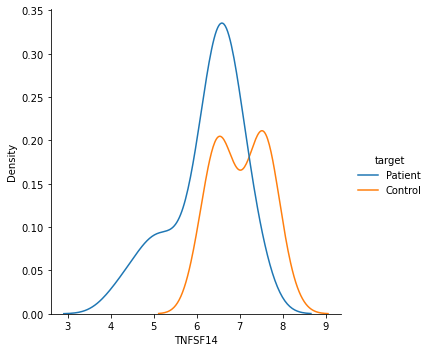

LPAR5
Test normality:  0.5917267799377441 0.3626883625984192
Patient:  8.394294037209303
Control:  9.007022155172415
MannwhitneyuResult(statistic=295.0, pvalue=0.0001659442954072462)


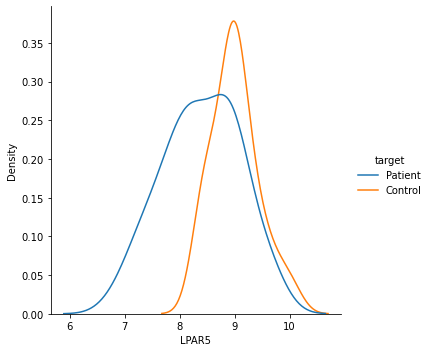

WDCP
Test normality:  0.06607241183519363 0.10614849627017975
Patient:  4.543802451162791
Control:  4.952671744827586
MannwhitneyuResult(statistic=304.0, pvalue=0.00024329267028696047)


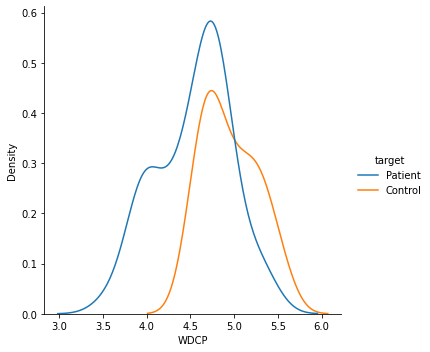

PARS2
Test normality:  0.11453873664140701 0.0010208921739831567
Patient:  6.471252788372094
Control:  6.837299331034482
MannwhitneyuResult(statistic=248.0, pvalue=1.625832655191279e-05)


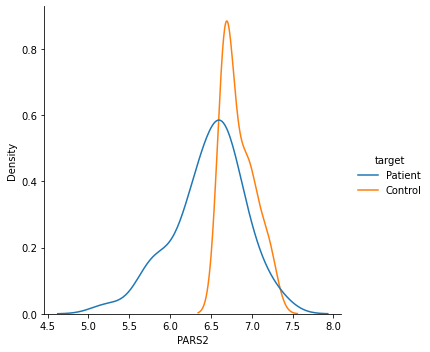

TBX21
Test normality:  0.14606086909770966 0.919567883014679
Patient:  9.48527853023256
Control:  10.124511379310343
MannwhitneyuResult(statistic=299.0, pvalue=0.0001992360445927979)


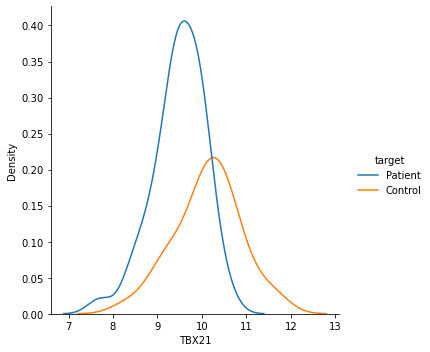

MED9
Test normality:  4.9057223804993555e-05 1.4573153066521627e-06
Patient:  3.7868035325581393
Control:  4.007135124137931
Test homogenius: LeveneResult(statistic=0.05591520351609398, pvalue=0.8137632485055217)
MannwhitneyuResult(statistic=248.0, pvalue=1.2895885534355753e-05)


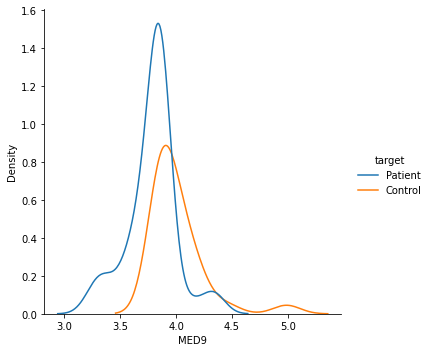

EIF4G3
Test normality:  0.0020375046879053116 8.325562816935417e-07
Patient:  3.6361156232558147
Control:  2.8413600172413793
Test homogenius: LeveneResult(statistic=27.30789090147095, pvalue=1.7088695114153878e-06)
Ttest_indResult(statistic=4.798166835987903, pvalue=1.0835271906403406e-05)


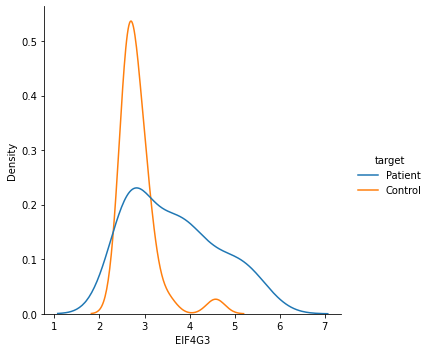

LRFN1
Test normality:  0.1839471459388733 0.01873243786394596
Patient:  4.552718158139535
Control:  4.771792106896552
MannwhitneyuResult(statistic=291.5, pvalue=0.00013090931964858507)


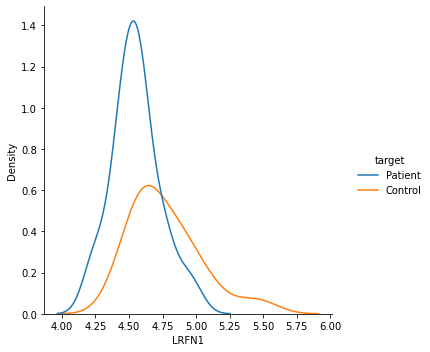

PLEKHF1
Test normality:  0.0031620769295841455 0.7061179280281067
Patient:  8.171204067441861
Control:  8.885316672413792
MannwhitneyuResult(statistic=283.0, pvalue=9.473865766385015e-05)


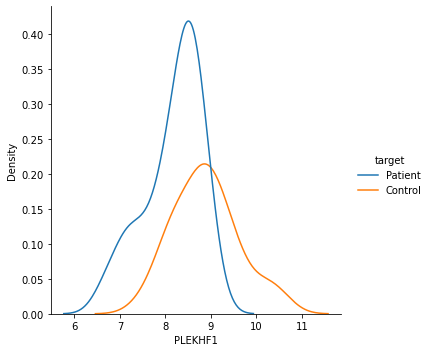

GPR68
Test normality:  0.31200748682022095 0.6936051249504089
Patient:  7.08709710232558
Control:  7.641825079310346
MannwhitneyuResult(statistic=261.5, pvalue=3.310199771688392e-05)


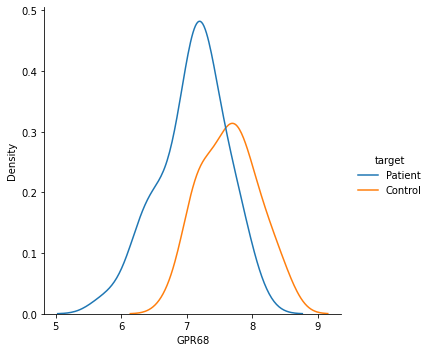

TMEM177
Test normality:  0.6544045209884644 0.7195218801498413
Patient:  5.8830980139534885
Control:  6.156888410344827
MannwhitneyuResult(statistic=309.5, pvalue=0.00031884674253795123)


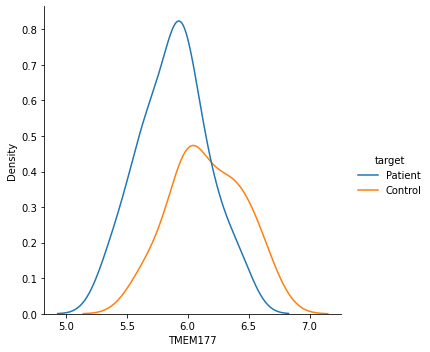

SH2D2A
Test normality:  0.07931095361709595 0.42978787422180176
Patient:  8.250200076744186
Control:  8.823767296551724
MannwhitneyuResult(statistic=299.0, pvalue=0.0001992360445927979)


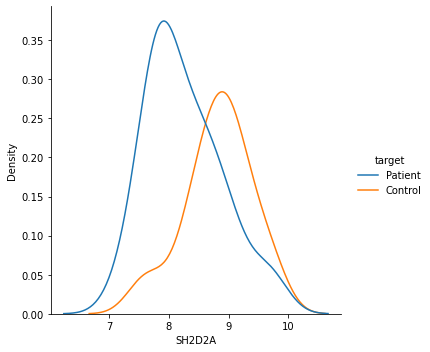

FOSL2
Test normality:  0.5651257038116455 0.44605639576911926
Patient:  8.444849795348837
Control:  8.980557689655173
MannwhitneyuResult(statistic=294.0, pvalue=0.00015848025357378162)


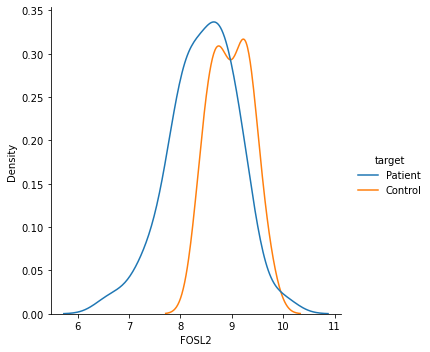

ERMP1
Test normality:  0.568425714969635 0.39334046840667725
Patient:  7.3836900674418615
Control:  7.76111585862069
MannwhitneyuResult(statistic=312.0, pvalue=0.0003559560336877513)


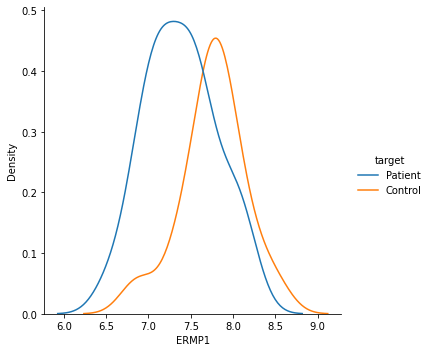

ACKR3
Test normality:  0.7920001149177551 0.08571472764015198
Patient:  6.805278258139534
Control:  7.246137493103448
MannwhitneyuResult(statistic=329.5, pvalue=0.000743464073573104)


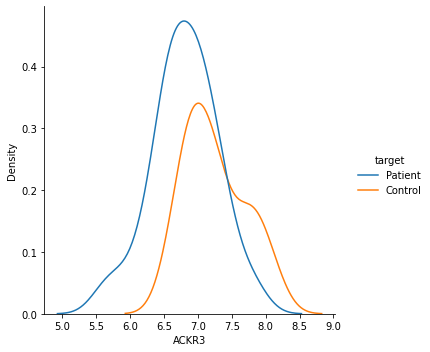

PRF1
Test normality:  0.47779178619384766 0.8885390162467957
Patient:  11.839769313953488
Control:  12.463348258620687
MannwhitneyuResult(statistic=291.0, pvalue=0.00013793915990005588)


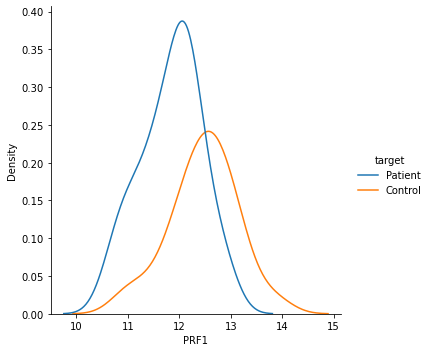

RNF227
Test normality:  0.7565479278564453 0.034815359860658646
Patient:  5.022712909302325
Control:  5.396576644827587
MannwhitneyuResult(statistic=262.0, pvalue=3.318385877680243e-05)


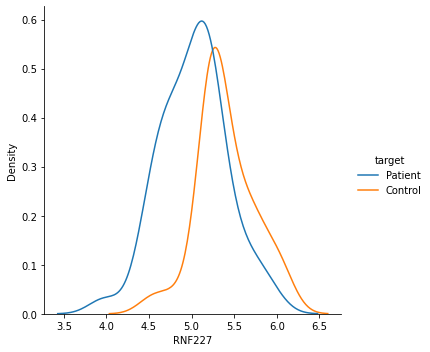

SLITRK4
Test normality:  0.2568719983100891 0.10685407370328903
Patient:  5.775876530232558
Control:  5.071215765517242
MannwhitneyuResult(statistic=948.0, pvalue=0.0001992360445927979)


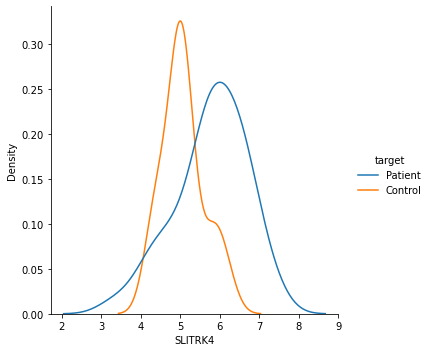

CLIC3
Test normality:  0.7780076861381531 0.44667989015579224
Patient:  10.026911790697676
Control:  10.688909637931035
MannwhitneyuResult(statistic=307.0, pvalue=0.0002854795823925997)


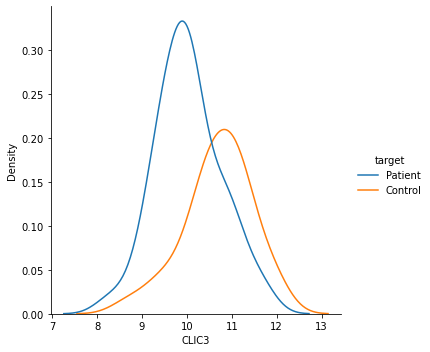

PPP2R2B
Test normality:  0.04177819564938545 0.5391749143600464
Patient:  7.262061904651162
Control:  7.8309844379310345
MannwhitneyuResult(statistic=305.0, pvalue=0.00026112502405719115)


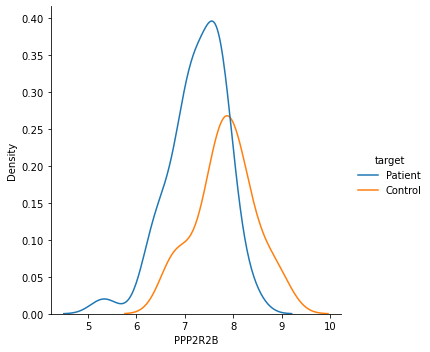

_______________________________________________
0                NAME       JRK LINC00540      TFRC  IGHV3-21    TUBBP5  \
2   Schizo1_GSM677118  3.895694   2.20131  3.462944  8.129587  2.199743   
3   Schizo1_GSM677119  3.888328  2.201112  2.965016   7.90488  2.199743   
4   Schizo1_GSM677120  3.178956  2.199321  2.715728  7.980897  2.710651   
5   Schizo1_GSM677121  4.036842  2.854815  3.235538   7.33206  2.199743   
6   Schizo1_GSM677122  3.660481  2.221155  2.266139  7.256032  2.199743   
..                ...       ...       ...       ...       ...       ...   
69    Ctrl1_GSM677178  4.596527   3.14734  3.213423  7.255362  2.199743   
70    Ctrl1_GSM677179  4.351369  2.225341  2.203011  7.187801  2.199743   
71    Ctrl1_GSM677180  4.222798   2.20131  2.203011  7.158546  2.199743   
72    Ctrl1_GSM677181  4.463442  2.199321  2.203011  6.103834  2.199743   
73    Ctrl1_GSM677182  4.540703   2.20131  2.203011  7.174185  2.237132   

0      ITSN1  IGHV3-23 ST3GAL1-DT      SLA2  ...   

ROC AUC 10 folds: 0.6766666666666666 +- 0.26014952965127147 std
Accuracy 10 folds: 0.7303571428571429 +- 0.21553948688851252 std
F1 10 folds: 0.7117965367965369 +- 0.23974069357832922 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_st

ROC AUC 10 folds: 0.72 +- 0.20273134932713294 std
Accuracy 10 folds: 0.6946428571428571 +- 0.17649687804373107 std
F1 10 folds: 0.6648809523809524 +- 0.20248124265748155 std
__________________________________________________________________________
model_name svm, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model', SVC())])
ROC AUC 10 folds: 0.7350000000000001 +- 0.16889345754054538 std
Accuracy 10 folds: 0.6660714285714284 +- 0.18246644925037814 std
F1 10 folds: 0.655 +- 0.18784024306867733 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model', RandomForestClassifier())])

ROC AUC 10 folds: 0.7816666666666667 +- 0.20172175556113592 std
Accuracy 10 folds: 0.7 +- 0.21440472885433765 std
F1 10 folds: 0.6913492063492063 +- 0.22559939477679974 std
__________________________________________________________________________


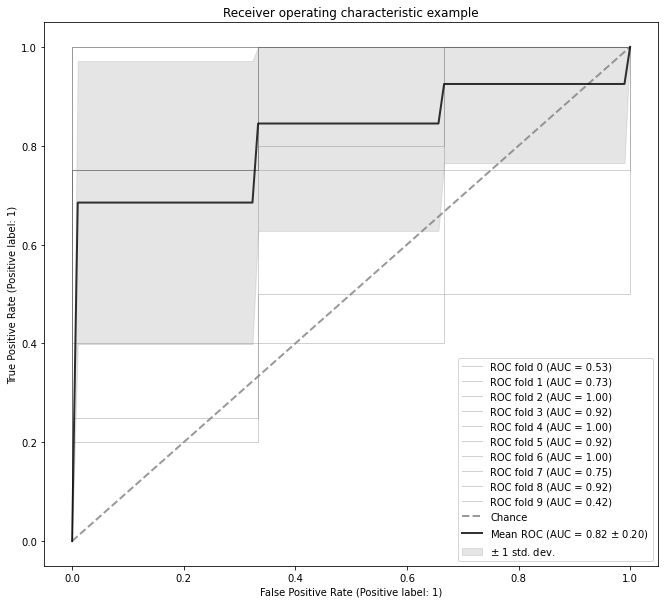

--------------------
______________stats___________________
SLITRK4
Test normality:  0.2568719983100891 0.10685407370328903
Patient:  5.775876530232558
Control:  5.071215765517242
MannwhitneyuResult(statistic=948.0, pvalue=0.0001992360445927979)


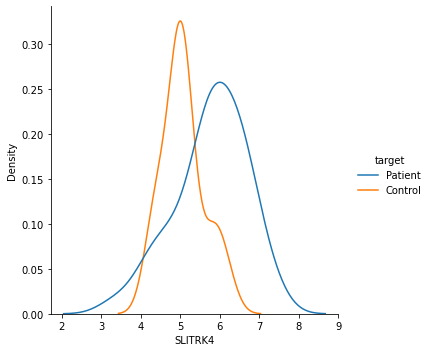

CXCL2
Test normality:  0.0949736163020134 0.03827493637800217
Patient:  6.731134493023254
Control:  5.124233020689655
MannwhitneyuResult(statistic=905.5, pvalue=0.0012251548629293257)


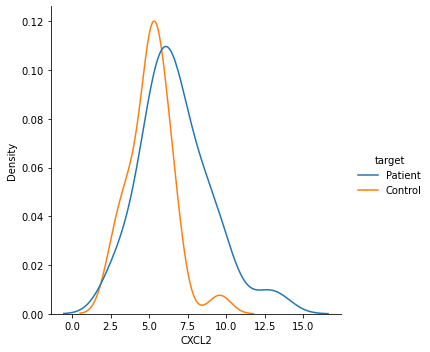

IGKV1D-8
Test normality:  0.0071950932033360004 0.06765230745077133
Patient:  5.194751951162791
Control:  4.5311767000000005
MannwhitneyuResult(statistic=942.5, pvalue=0.0002499745028644871)


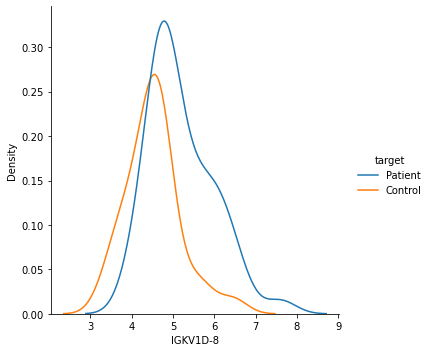

EGR3
Test normality:  1.4933656530047301e-05 0.000677992997225374
Patient:  4.412163248837209
Control:  3.307762513793104
Test homogenius: LeveneResult(statistic=15.234086265297679, pvalue=0.00021595007664598867)
Ttest_indResult(statistic=4.4982035879372955, pvalue=4.2995541182055845e-05)


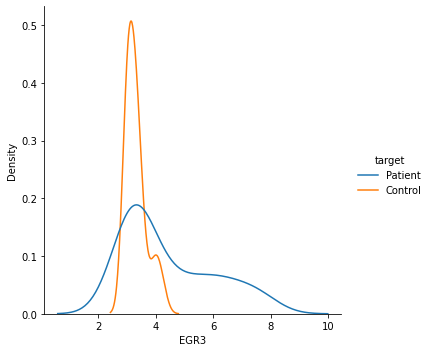

EIF4G3
Test normality:  0.0020375046879053116 8.325562816935417e-07
Patient:  3.6361156232558147
Control:  2.8413600172413793
Test homogenius: LeveneResult(statistic=27.30789090147095, pvalue=1.7088695114153878e-06)
Ttest_indResult(statistic=4.798166835987903, pvalue=1.0835271906403406e-05)


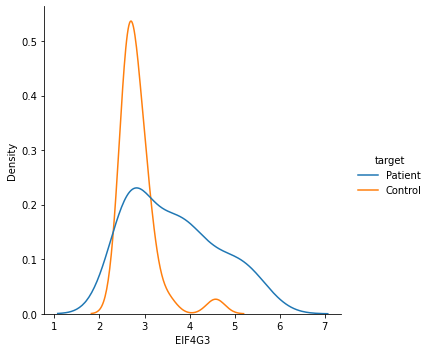

LAIR2
Test normality:  0.575092613697052 0.06118053197860718
Patient:  8.35527405116279
Control:  9.334027213793105
MannwhitneyuResult(statistic=323.0, pvalue=0.0005722671828278186)


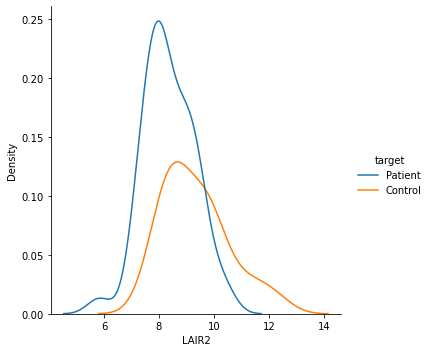

PSPH
Test normality:  3.0562384836230194e-06 9.052364475792274e-07
Patient:  7.797850834883722
Control:  5.7919153
Test homogenius: LeveneResult(statistic=3.7388145193713673, pvalue=0.05720654662822168)
MannwhitneyuResult(statistic=840.5, pvalue=0.012906850526514262)


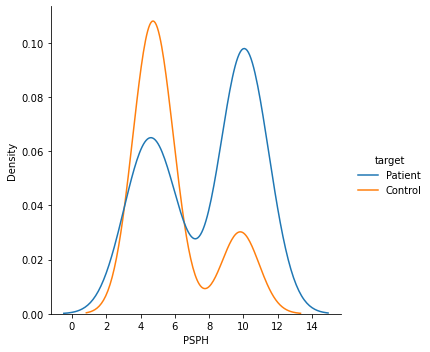

CNOT6L
Test normality:  0.04157092049717903 0.544249415397644
Patient:  6.332948602325581
Control:  6.831423899999999
MannwhitneyuResult(statistic=412.0, pvalue=0.015410662622731854)


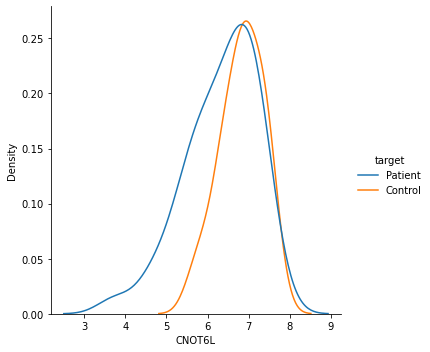

PTGDS
Test normality:  0.8272127509117126 0.06796380877494812
Patient:  9.846831755813952
Control:  10.736869568965517
MannwhitneyuResult(statistic=323.0, pvalue=0.0005722671828278186)


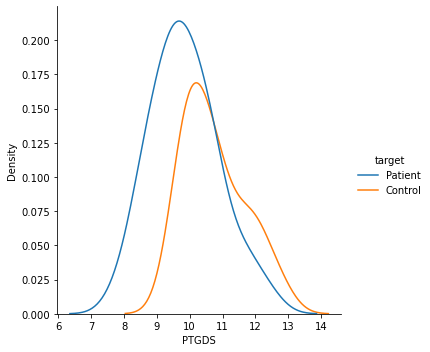

CLCN4
Test normality:  0.4102509319782257 0.18159730732440948
Patient:  5.315932613953489
Control:  4.595491051724138
MannwhitneyuResult(statistic=902.0, pvalue=0.001404185469244473)


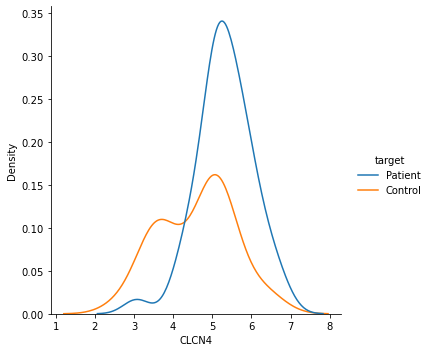

ANKRD36BP2
Test normality:  0.1885172724723816 0.05689181387424469
Patient:  4.386448039534884
Control:  3.7258474448275867
MannwhitneyuResult(statistic=859.5, pvalue=0.006820439577561067)


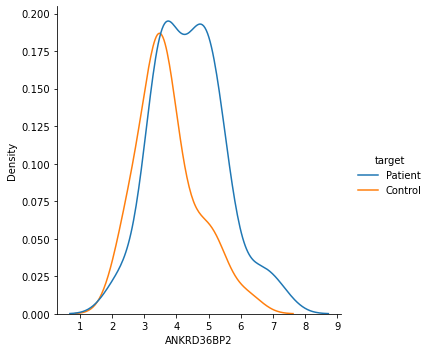

NLRP2
Test normality:  0.028910761699080467 0.009380961768329144
Patient:  4.048224290697675
Control:  4.956113493103449
Test homogenius: LeveneResult(statistic=0.7210523530972625, pvalue=0.39869365641137)
MannwhitneyuResult(statistic=363.0, pvalue=0.002810017110341866)


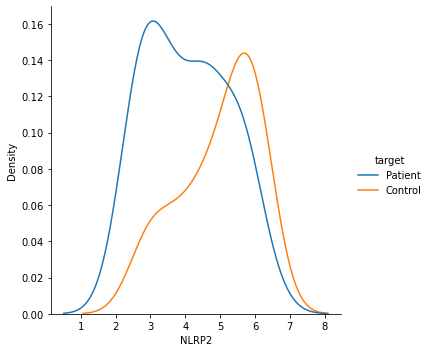

CUTALP
Test normality:  0.0021498375572264194 4.8114230594364926e-05
Patient:  8.714614095348837
Control:  9.261686817241381
Test homogenius: LeveneResult(statistic=0.8968371412600991, pvalue=0.34688900248846455)
MannwhitneyuResult(statistic=423.0, pvalue=0.02165848413136925)


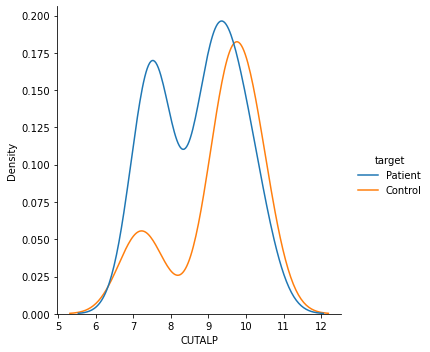

PLA2G4C
Test normality:  0.001400883891619742 0.08310620486736298
Patient:  4.860478146511628
Control:  4.011447658620689
MannwhitneyuResult(statistic=893.0, pvalue=0.0018766260127252151)


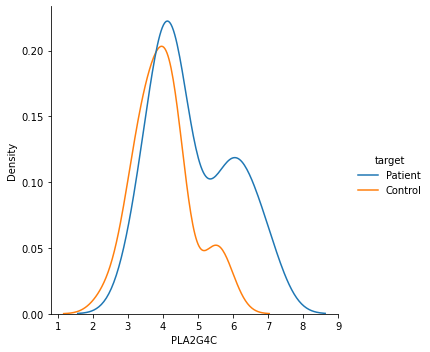

SOCS3
Test normality:  0.08936072140932083 0.4336604177951813
Patient:  9.488170953488371
Control:  8.727325137931034
MannwhitneyuResult(statistic=880.5, pvalue=0.0032294384826030567)


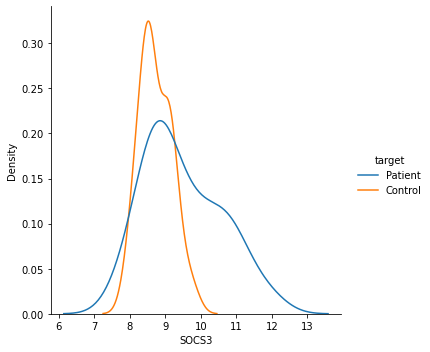

STEAP4
Test normality:  0.0007737315027043223 0.0013620962854474783
Patient:  8.929333195348837
Control:  8.357309644827586
Test homogenius: LeveneResult(statistic=0.898968984800215, pvalue=0.3463201562687732)
MannwhitneyuResult(statistic=836.0, pvalue=0.01493039331563233)


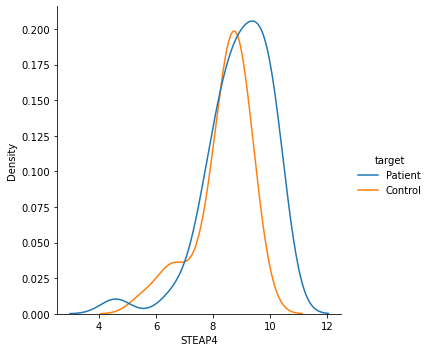

UAP1L1
Test normality:  0.903862476348877 0.0017869542352855206
Patient:  6.511111918604651
Control:  6.064263806896552
MannwhitneyuResult(statistic=853.0, pvalue=0.008552090256703676)


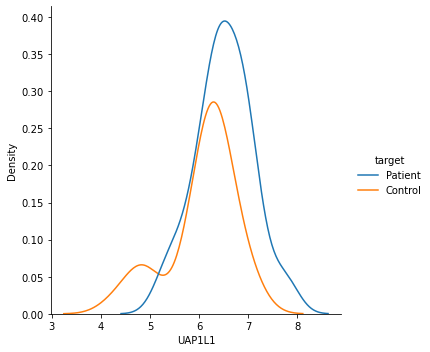

HSPA1B
Test normality:  0.9011152386665344 0.31748586893081665
Patient:  7.075511660465117
Control:  7.655265413793103
MannwhitneyuResult(statistic=385.0, pvalue=0.0062840362948429)


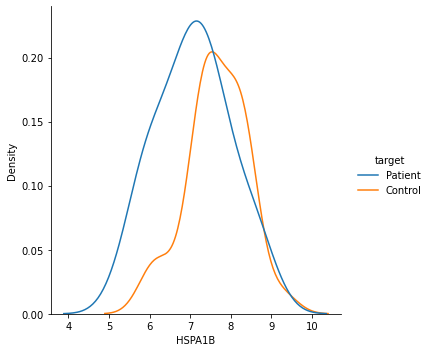

ADAMTS1
Test normality:  0.13119909167289734 0.5024404525756836
Patient:  3.814174611627907
Control:  4.8655855
MannwhitneyuResult(statistic=341.5, pvalue=0.0012267168677175678)


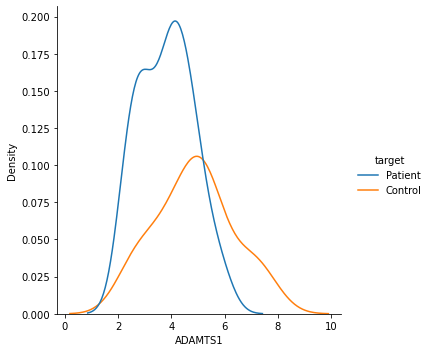

FAM118A
Test normality:  0.037067070603370667 0.058433253318071365
Patient:  7.571464555813953
Control:  8.232467989655174
MannwhitneyuResult(statistic=351.0, pvalue=0.0017904886552095112)


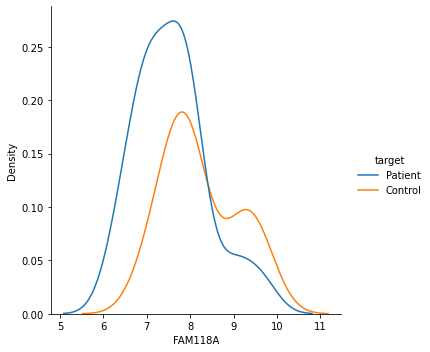

_______________________________________________
0                NAME  ADAMDEC1      GLDC    SLC4A1 ANKRD20A1    ABCA13  \
2   Schizo1_GSM677118  3.520948  5.921778  4.668667  6.401683  2.199321   
3   Schizo1_GSM677119  3.499915  3.439782  5.469609  5.627536  2.199321   
4   Schizo1_GSM677120  2.199321  4.052875  3.848009  5.006158  2.199321   
5   Schizo1_GSM677121  4.050993  3.152878  4.073133  5.381779  2.250284   
6   Schizo1_GSM677122  2.388443  3.102047  4.210024  6.086645  2.199321   
..                ...       ...       ...       ...       ...       ...   
69    Ctrl1_GSM677178  2.199321  3.102553  5.337886  6.229305  2.199321   
70    Ctrl1_GSM677179  2.405745  4.375266  4.290716  4.005928  2.199321   
71    Ctrl1_GSM677180  2.405745  4.207759  4.546753  5.006158  2.706377   
72    Ctrl1_GSM677181  2.405745  3.152878  4.508265  5.006158  2.199321   
73    Ctrl1_GSM677182  2.405745  2.923772  4.075787  5.102396  2.199321   

0      BACH1    FAR2P2    DPYSL4   FAM110C  ...    

ROC AUC 10 folds: 0.7016666666666667 +- 0.23219364523795408 std
Accuracy 10 folds: 0.6982142857142857 +- 0.21906136732217577 std
F1 10 folds: 0.6613980463980463 +- 0.2376417020533342 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_sto

ROC AUC 10 folds: 0.78 +- 0.12445436468396313 std
Accuracy 10 folds: 0.7232142857142857 +- 0.12300707213781803 std
F1 10 folds: 0.7134920634920634 +- 0.1270017348903351 std
__________________________________________________________________________
model_name svm, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model', SVC())])
ROC AUC 10 folds: 0.8099999999999999 +- 0.12849556844930923 std
Accuracy 10 folds: 0.7517857142857143 +- 0.13373795959537702 std
F1 10 folds: 0.7310714285714287 +- 0.1444740997379355 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model', RandomForestClas

ROC AUC 10 folds: 0.7866666666666667 +- 0.1305543735171076 std
Accuracy 10 folds: 0.7392857142857143 +- 0.12351154618421845 std
F1 10 folds: 0.7063239538239539 +- 0.13850054969871028 std
__________________________________________________________________________


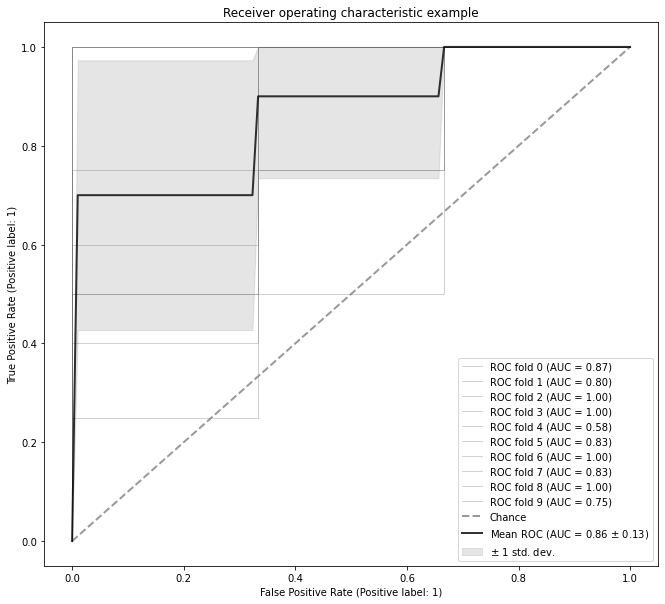

--------------------
______________stats___________________
EIF4G3
Test normality:  0.0020375046879053116 8.325562816935417e-07
Patient:  3.6361156232558147
Control:  2.8413600172413793
Test homogenius: LeveneResult(statistic=27.30789090147095, pvalue=1.7088695114153878e-06)
Ttest_indResult(statistic=4.798166835987903, pvalue=1.0835271906403406e-05)


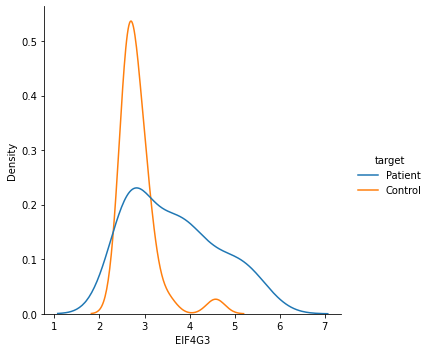

SOD2
Test normality:  1.6947915071341413e-08 1.2343526201163968e-09
Patient:  3.1554666348837213
Control:  2.520222527586207
Test homogenius: LeveneResult(statistic=4.5040599338064435, pvalue=0.03735437455499661)
Ttest_indResult(statistic=2.484842376642948, pvalue=0.015442383638392669)


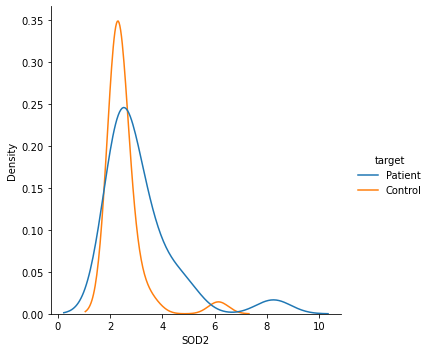

PSPH
Test normality:  3.0562384836230194e-06 9.052364475792274e-07
Patient:  7.797850834883722
Control:  5.7919153
Test homogenius: LeveneResult(statistic=3.7388145193713673, pvalue=0.05720654662822168)
MannwhitneyuResult(statistic=840.5, pvalue=0.012906850526514262)


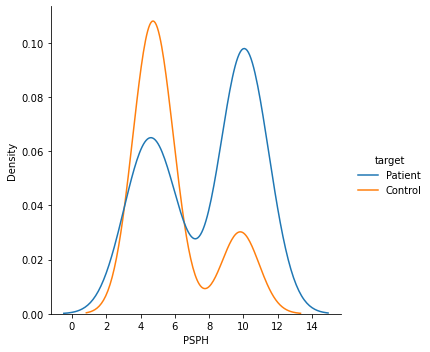

COL19A1
Test normality:  0.00046915278653614223 0.00019206111028324813
Patient:  3.1317232697674413
Control:  2.72750441724138
Test homogenius: LeveneResult(statistic=5.492018477413241, pvalue=0.021948963654041274)
Ttest_indResult(statistic=3.0673918930890114, pvalue=0.003073229071521585)


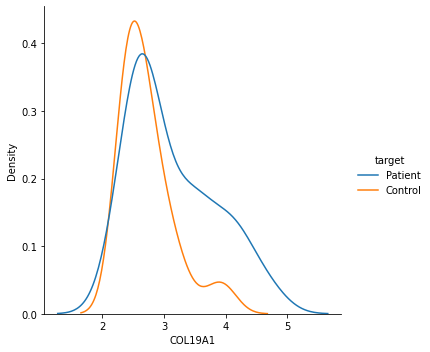

NR4A2
Test normality:  0.03282201662659645 0.30291327834129333
Patient:  6.77509649767442
Control:  6.037371251724138
MannwhitneyuResult(statistic=749.5, pvalue=0.1495878134183161)


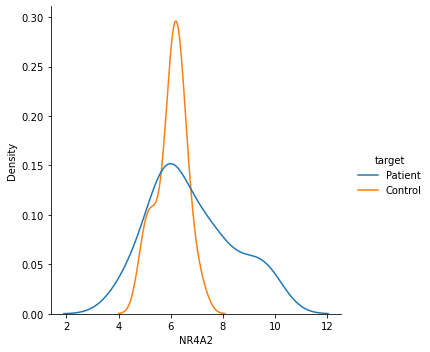

CXCL2
Test normality:  0.0949736163020134 0.03827493637800217
Patient:  6.731134493023254
Control:  5.124233020689655
MannwhitneyuResult(statistic=905.5, pvalue=0.0012251548629293257)


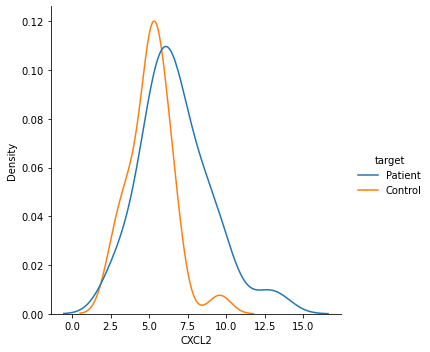

RHOBTB3
Test normality:  0.07216041535139084 0.4727056920528412
Patient:  3.9081355720930233
Control:  4.733570737931036
MannwhitneyuResult(statistic=354.5, pvalue=0.0020430318280473497)


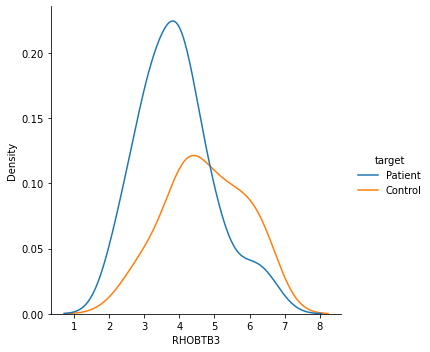

S1PR5
Test normality:  0.14677558839321136 0.553509533405304
Patient:  4.286343306976744
Control:  5.01159918275862
MannwhitneyuResult(statistic=321.5, pvalue=0.0005270011144099069)


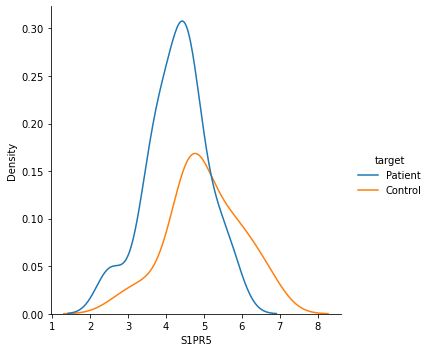

FAM118A
Test normality:  1.3505996321327984e-06 7.82948118285276e-05
Patient:  4.728699913953489
Control:  5.695255306896552
Test homogenius: LeveneResult(statistic=3.2351680352290155, pvalue=0.07638391977976923)
MannwhitneyuResult(statistic=369.0, pvalue=0.0034669011396722058)


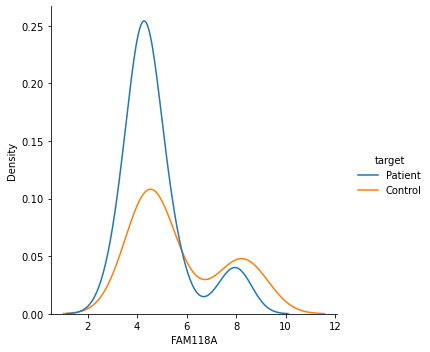

PTGDR
Test normality:  0.020976077765226364 0.1617455780506134
Patient:  5.4537936744186055
Control:  6.298986306896553
MannwhitneyuResult(statistic=360.5, pvalue=0.002572135129768682)


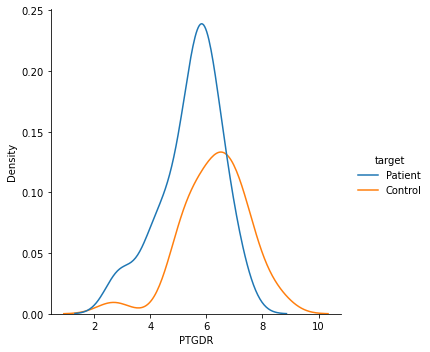

EGR3
Test normality:  1.4933656530047301e-05 0.000677992997225374
Patient:  4.412163248837209
Control:  3.307762513793104
Test homogenius: LeveneResult(statistic=15.234086265297679, pvalue=0.00021595007664598867)
Ttest_indResult(statistic=4.4982035879372955, pvalue=4.2995541182055845e-05)


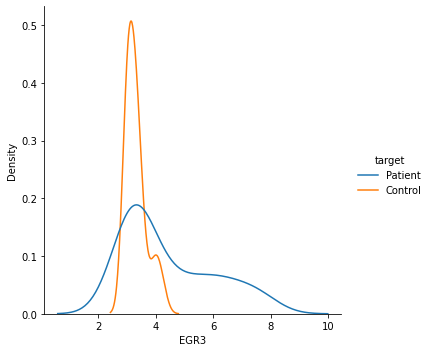

CXCL8
Test normality:  0.2464168518781662 0.25864607095718384
Patient:  9.491604302325582
Control:  7.969760141379311
MannwhitneyuResult(statistic=875.0, pvalue=0.003953619122800532)


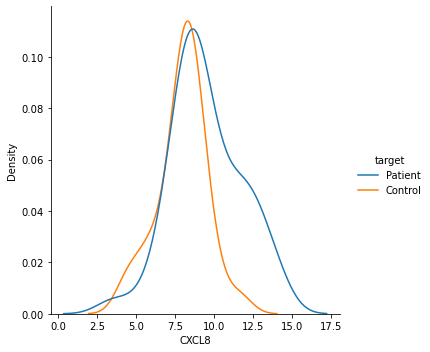

GNAL
Test normality:  1.4054130303975398e-07 0.0010336560662835836
Patient:  2.639884188372093
Control:  3.4150537137931036
Test homogenius: LeveneResult(statistic=19.08784540308179, pvalue=4.239068846854812e-05)
Ttest_indResult(statistic=-3.1776375470520253, pvalue=0.0030169168418421478)


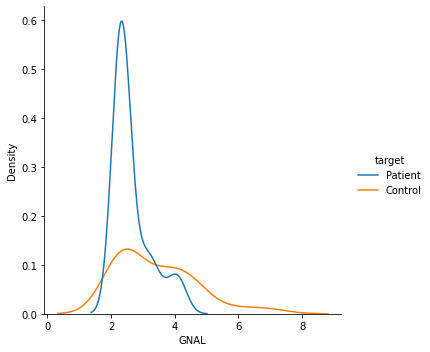

NLRP2
Test normality:  0.028910761699080467 0.009380961768329144
Patient:  4.048224290697675
Control:  4.956113493103449
Test homogenius: LeveneResult(statistic=0.7210523530972625, pvalue=0.39869365641137)
MannwhitneyuResult(statistic=363.0, pvalue=0.002810017110341866)


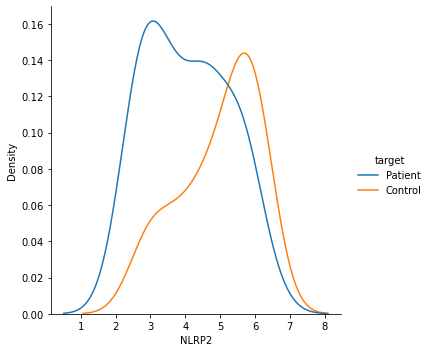

AHSP
Test normality:  5.245249790064577e-10 1.090724247032604e-10
Patient:  3.026015553488372
Control:  2.3279020689655177
Test homogenius: LeveneResult(statistic=4.897269767836356, pvalue=0.030161656838697513)
Ttest_indResult(statistic=2.6111643172754264, pvalue=0.011825115694178991)


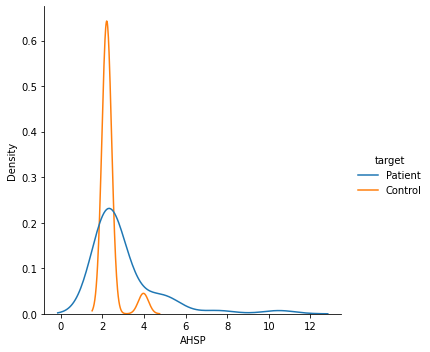

ETNK1
Test normality:  2.314593075425364e-06 2.127365092974287e-07
Patient:  2.970707388372093
Control:  2.5154751827586206
Test homogenius: LeveneResult(statistic=10.280510341969913, pvalue=0.002027216921882035)
Ttest_indResult(statistic=3.940826916617807, pvalue=0.00023690400536621338)


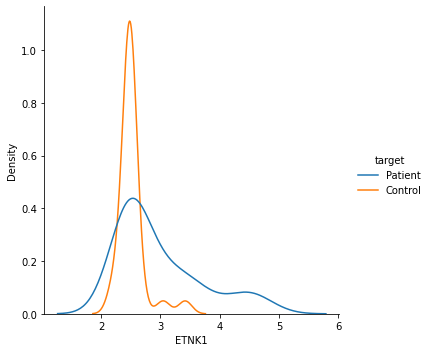

ENPP5
Test normality:  0.0011911169858649373 0.2939223647117615
Patient:  3.8251163534883714
Control:  4.472610427586206
MannwhitneyuResult(statistic=391.5, pvalue=0.0076395780313227015)


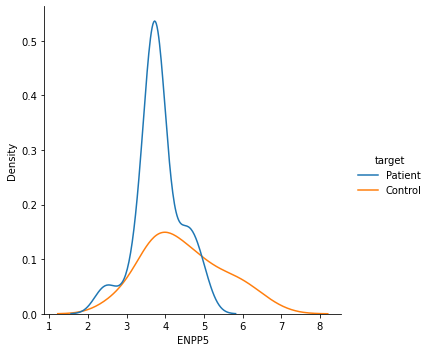

ANKRD36BP2
Test normality:  0.1885172724723816 0.05689181387424469
Patient:  4.386448039534884
Control:  3.7258474448275867
MannwhitneyuResult(statistic=859.5, pvalue=0.006820439577561067)


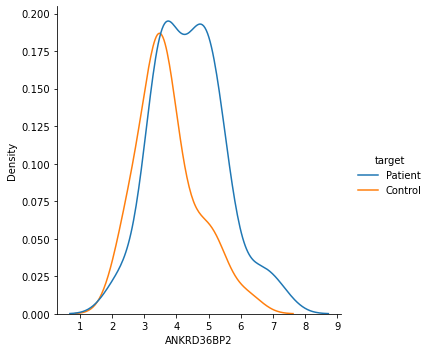

SLC8A1
Test normality:  0.0007017654133960605 1.2778783684552764e-06
Patient:  3.4215400093023254
Control:  2.979864565517241
Test homogenius: LeveneResult(statistic=3.0352024861895233, pvalue=0.08586853298755971)
MannwhitneyuResult(statistic=849.0, pvalue=0.00976067798547583)


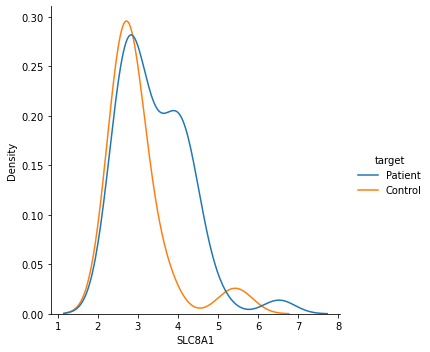

CSNK2A1
Test normality:  0.07385651767253876 0.5928929448127747
Patient:  3.4927323255813953
Control:  4.006421110344828
MannwhitneyuResult(statistic=375.0, pvalue=0.0044037499636338)


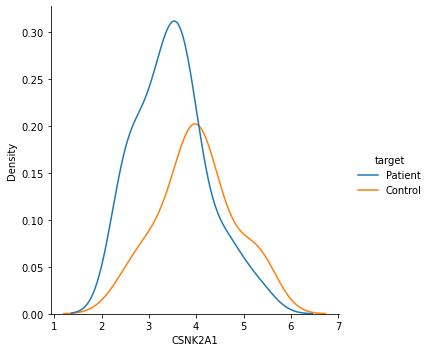

_______________________________________________
0                NAME    SLC4A1    ABCA13        TNF  C17orf97      CDH1  \
2   Schizo1_GSM677118  4.668667  2.199321     3.9369   5.03231  2.668066   
3   Schizo1_GSM677119  5.469609  2.199321   4.224177  2.553762  3.385774   
4   Schizo1_GSM677120  3.848009  2.199321  11.078245  6.503137  2.328487   
5   Schizo1_GSM677121  4.073133  2.250284   5.104992  2.553762  3.437712   
6   Schizo1_GSM677122  4.210024  2.199321   4.767317  2.553762  3.193533   
..                ...       ...       ...        ...       ...       ...   
69    Ctrl1_GSM677178  5.337886  2.199321   3.204028  2.667859  2.339236   
70    Ctrl1_GSM677179  4.290716  2.199321   4.042027  2.744292  6.716728   
71    Ctrl1_GSM677180  4.546753  2.706377    4.11213  5.896655  2.904692   
72    Ctrl1_GSM677181  4.508265  2.199321   3.977319  2.553762  2.717855   
73    Ctrl1_GSM677182  4.075787  2.199321   5.194914  5.522012  2.339236   

0  LINC01505   PGLYRP1     CCNL1   SLC1

ROC AUC 10 folds: 0.7683333333333333 +- 0.1682342942974998 std
Accuracy 10 folds: 0.7267857142857143 +- 0.16052568298549358 std
F1 10 folds: 0.7089862914862917 +- 0.15870173106483895 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_sto

ROC AUC 10 folds: 0.7849999999999999 +- 0.1606324306538931 std
Accuracy 10 folds: 0.7374999999999999 +- 0.15153340373983418 std
F1 10 folds: 0.7258333333333333 +- 0.15935822666762942 std
__________________________________________________________________________
model_name svm, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model', SVC())])
ROC AUC 10 folds: 0.7849999999999999 +- 0.1606324306538931 std
Accuracy 10 folds: 0.7374999999999999 +- 0.15153340373983418 std
F1 10 folds: 0.7258333333333333 +- 0.15935822666762942 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model', Ra

ROC AUC 10 folds: 0.7983333333333333 +- 0.13238202294873724 std
Accuracy 10 folds: 0.7642857142857142 +- 0.15273860557387925 std
F1 10 folds: 0.7579761904761904 +- 0.1548495325791618 std
__________________________________________________________________________


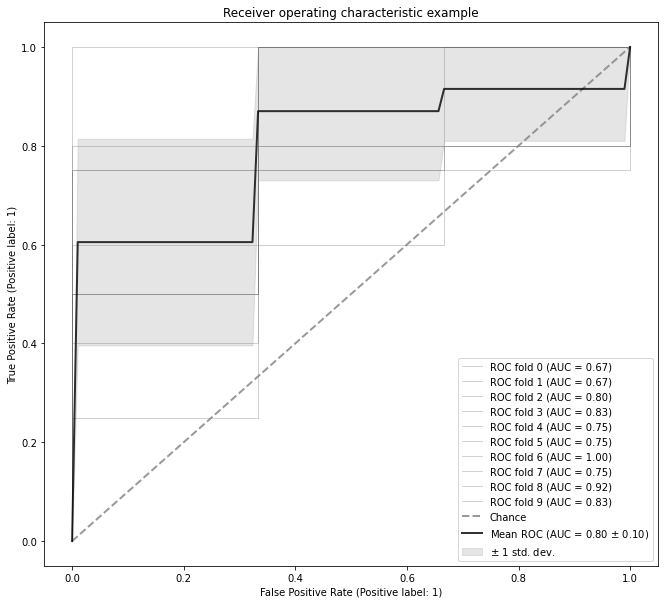

--------------------
______________stats___________________
PTGS2
Test normality:  5.899531061004382e-06 0.00016223439888563007
Patient:  4.161142890697675
Control:  2.744833824137931
Test homogenius: LeveneResult(statistic=14.232126708297745, pvalue=0.00033480280236238404)
Ttest_indResult(statistic=3.996144955819121, pvalue=0.00022765272786630082)


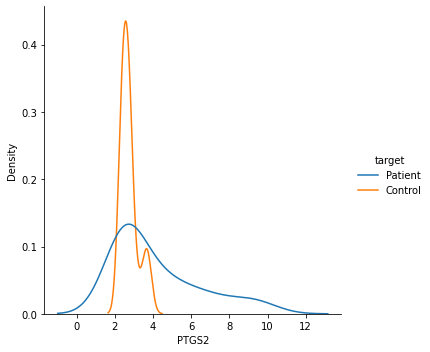

EGR3
Test normality:  1.4933656530047301e-05 0.000677992997225374
Patient:  4.412163248837209
Control:  3.307762513793104
Test homogenius: LeveneResult(statistic=15.234086265297679, pvalue=0.00021595007664598867)
Ttest_indResult(statistic=4.4982035879372955, pvalue=4.2995541182055845e-05)


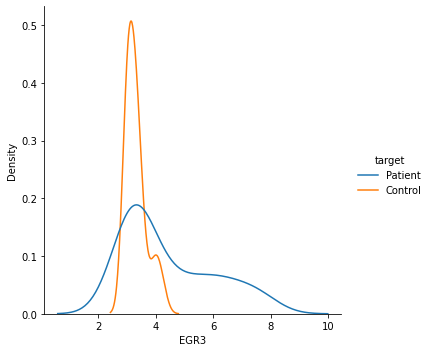

PSPH
Test normality:  3.0562384836230194e-06 9.052364475792274e-07
Patient:  7.797850834883722
Control:  5.7919153
Test homogenius: LeveneResult(statistic=3.7388145193713673, pvalue=0.05720654662822168)
MannwhitneyuResult(statistic=840.5, pvalue=0.012906850526514262)


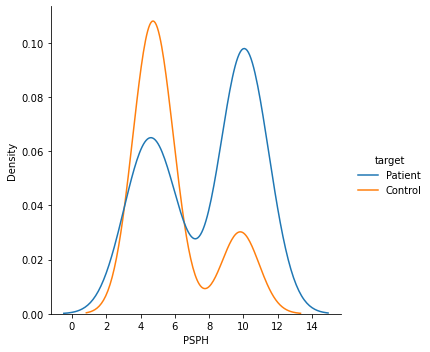

GNAL
Test normality:  1.4054130303975398e-07 0.0010336560662835836
Patient:  2.639884188372093
Control:  3.4150537137931036
Test homogenius: LeveneResult(statistic=19.08784540308179, pvalue=4.239068846854812e-05)
Ttest_indResult(statistic=-3.1776375470520253, pvalue=0.0030169168418421478)


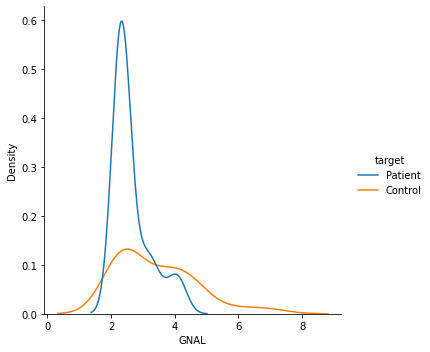

ADAMTS1
Test normality:  0.17829252779483795 0.5024404525756836
Patient:  3.811615065116279
Control:  4.8655855
MannwhitneyuResult(statistic=341.5, pvalue=0.0012268284896363962)


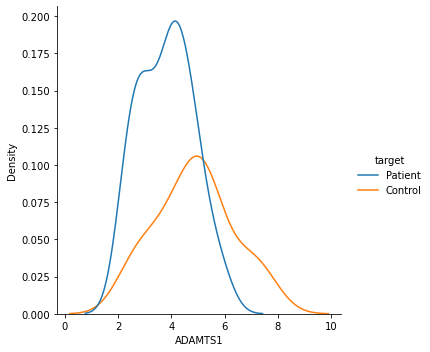

SOD2
Test normality:  1.6947915071341413e-08 1.2343526201163968e-09
Patient:  3.1554666348837213
Control:  2.520222527586207
Test homogenius: LeveneResult(statistic=4.5040599338064435, pvalue=0.03735437455499661)
Ttest_indResult(statistic=2.484842376642948, pvalue=0.015442383638392669)


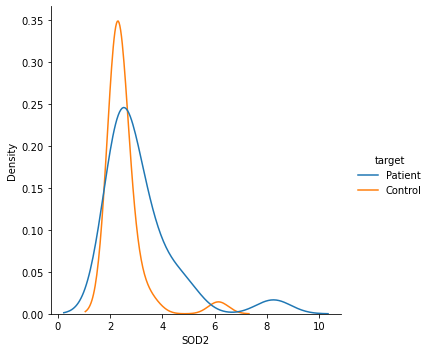

CXCL2
Test normality:  0.0949736163020134 0.03827493637800217
Patient:  6.731134493023254
Control:  5.124233020689655
MannwhitneyuResult(statistic=905.5, pvalue=0.0012251548629293257)


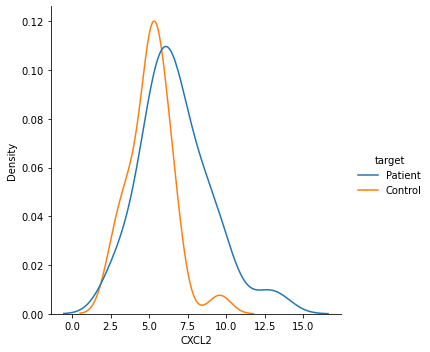

ORM1
Test normality:  4.0859212901978026e-08 5.98562166942429e-07
Patient:  3.195469704651163
Control:  2.8266091068965506
Test homogenius: LeveneResult(statistic=2.8272963492667427, pvalue=0.09713102394957607)
MannwhitneyuResult(statistic=677.5, pvalue=0.5347286701646068)


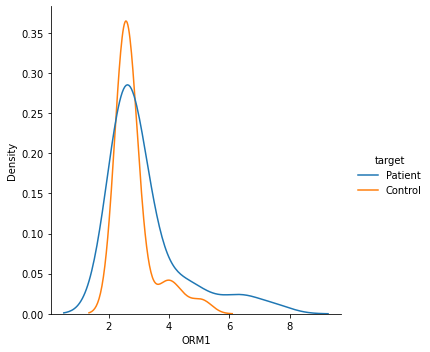

HLA-DQA1
Test normality:  5.0819588537365235e-09 0.8248356580734253
Patient:  10.836924941860467
Control:  11.286996827586206
MannwhitneyuResult(statistic=648.0, pvalue=0.7828836000135538)


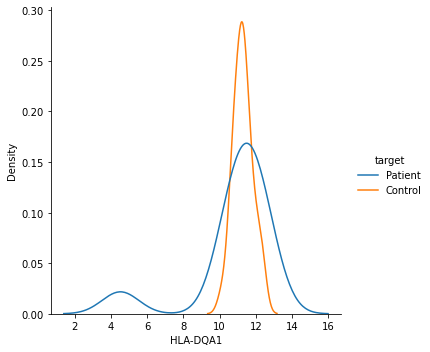

LINC01505
Test normality:  5.775491196402527e-11 8.874459126673173e-06
Patient:  2.5101303627906977
Control:  3.0148845689655173
Test homogenius: LeveneResult(statistic=6.496568841578141, pvalue=0.013003323967828538)
Ttest_indResult(statistic=-2.3496254401539054, pvalue=0.023496311107250582)


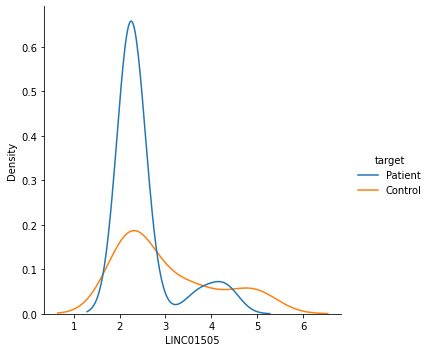

AHSP
Test normality:  5.245249790064577e-10 1.090724247032604e-10
Patient:  3.026015553488372
Control:  2.3279020689655177
Test homogenius: LeveneResult(statistic=4.897269767836356, pvalue=0.030161656838697513)
Ttest_indResult(statistic=2.6111643172754264, pvalue=0.011825115694178991)


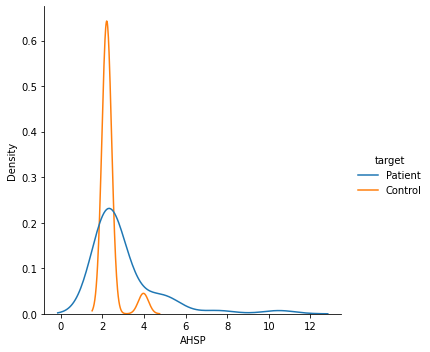

DSP
Test normality:  0.0002207347861258313 0.0002990996290463954
Patient:  3.9434083837209304
Control:  3.5719815758620688
Test homogenius: LeveneResult(statistic=0.4694224969096263, pvalue=0.49551557326188966)
MannwhitneyuResult(statistic=692.5, pvalue=0.43044001765930506)


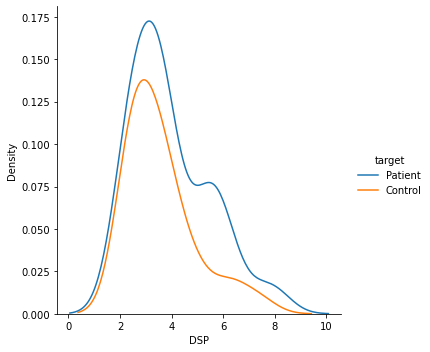

KRT1
Test normality:  2.1874591027426504e-08 9.512706355963019e-08
Patient:  3.1776881348837214
Control:  2.8158238068965513
Test homogenius: LeveneResult(statistic=1.1266743980563423, pvalue=0.29213430719773736)
MannwhitneyuResult(statistic=636.5, pvalue=0.8856059563087636)


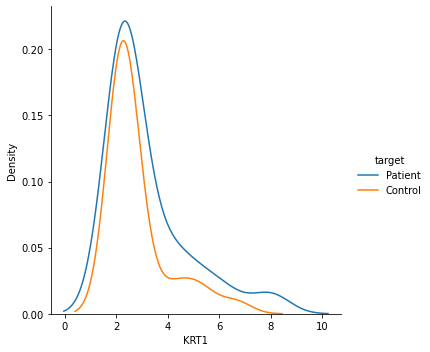

TACSTD2
Test normality:  9.493779771219124e-07 6.013198117216234e-07
Patient:  4.311210895348837
Control:  3.6142442586206904
Test homogenius: LeveneResult(statistic=2.0705446159445327, pvalue=0.15462450441318462)
MannwhitneyuResult(statistic=743.0, pvalue=0.16719845905293407)


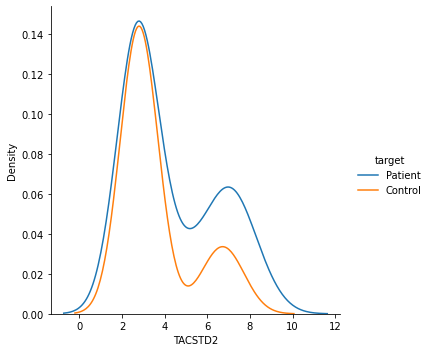

CRISP3
Test normality:  7.561491770502471e-07 3.633217886545026e-07
Patient:  4.125310316279069
Control:  3.244693386206897
Test homogenius: LeveneResult(statistic=3.138660041923393, pvalue=0.0808088814692685)
MannwhitneyuResult(statistic=710.5, pvalue=0.31629844424038145)


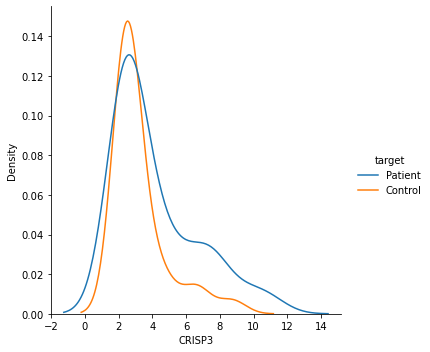

FAM157C
Test normality:  5.829333127316261e-10 3.4880412447257925e-10
Patient:  2.6896238790697673
Control:  2.4447536
Test homogenius: LeveneResult(statistic=1.4323671295936649, pvalue=0.23541616175972802)
MannwhitneyuResult(statistic=754.0, pvalue=0.11443816318424527)


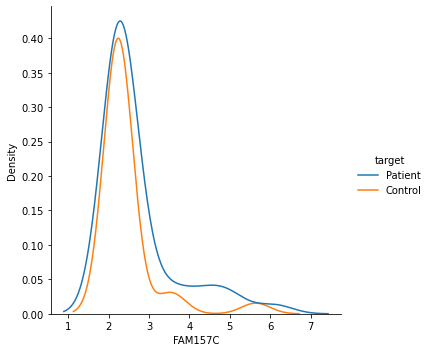

CEACAM1
Test normality:  9.623715713225067e-11 3.4161562467716067e-10
Patient:  2.7105147744186047
Control:  2.322918696551724
Test homogenius: LeveneResult(statistic=2.924580338626716, pvalue=0.09166917448279348)
MannwhitneyuResult(statistic=691.0, pvalue=0.36526639371944025)


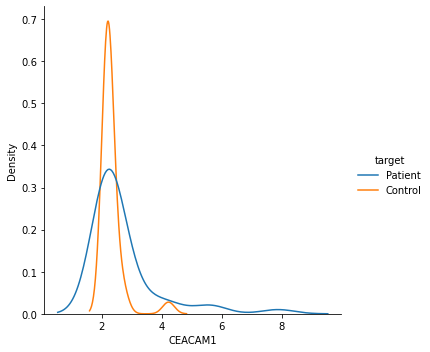

NRG1
Test normality:  0.00017859124636743218 0.0002812897728290409
Patient:  3.6660889418604654
Control:  3.0054512068965518
Test homogenius: LeveneResult(statistic=8.70441789103258, pvalue=0.004314520191164463)
Ttest_indResult(statistic=2.9397643164782066, pvalue=0.004475374309396927)


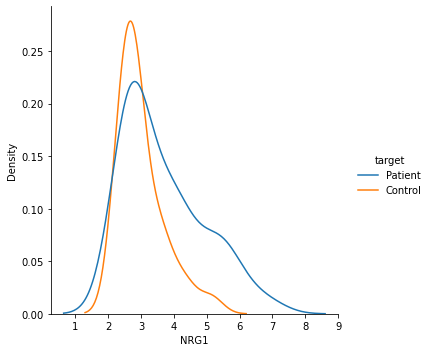

FAM118A
Test normality:  1.3505996321327984e-06 7.82948118285276e-05
Patient:  4.728699913953489
Control:  5.695255306896552
Test homogenius: LeveneResult(statistic=3.2351680352290155, pvalue=0.07638391977976923)
MannwhitneyuResult(statistic=369.0, pvalue=0.0034669011396722058)


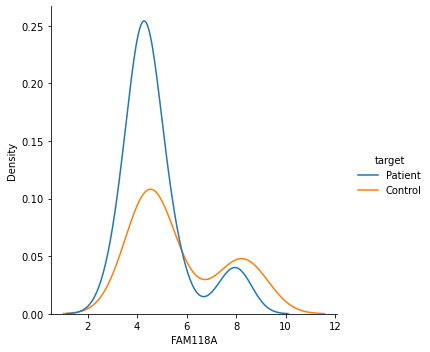

SLC4A1
Test normality:  1.474597013384482e-07 4.7252724471036345e-06
Patient:  5.204550537209303
Control:  4.42299826551724
Test homogenius: LeveneResult(statistic=4.972098826989369, pvalue=0.028968839329197898)
Ttest_indResult(statistic=2.3090073474509536, pvalue=0.024529148596812135)


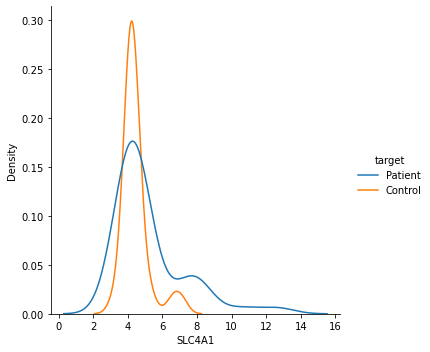

_______________________________________________
0                NAME      ORM1     ALAS2     NUMA1     EPB42    CRISP3  \
2   Schizo1_GSM677118  2.199321  2.199321  2.199321  2.199321  4.438188   
3   Schizo1_GSM677119  2.199321  2.273582  4.724956     2.203  2.551511   
4   Schizo1_GSM677120  2.199321  2.199321  2.199321  2.199321  2.466505   
5   Schizo1_GSM677121  3.720719  2.199321   3.18692  2.199321  2.319901   
6   Schizo1_GSM677122  2.199321  2.199321  2.199321  2.199321   2.48846   
..                ...       ...       ...       ...       ...       ...   
69    Ctrl1_GSM677178  2.199321  2.199321  2.199321  2.199321  2.491589   
70    Ctrl1_GSM677179  2.199321  2.199321  2.199321  2.199321  2.319901   
71    Ctrl1_GSM677180  2.199321  2.199321  2.199321  2.199321  4.948936   
72    Ctrl1_GSM677181  2.199321  2.199321  3.827046  2.199321  2.319901   
73    Ctrl1_GSM677182  2.199321  2.199321  2.199321  2.199321   2.48846   

0    TACSTD2     CXCL1     TMTC1     PTGS2  ...    

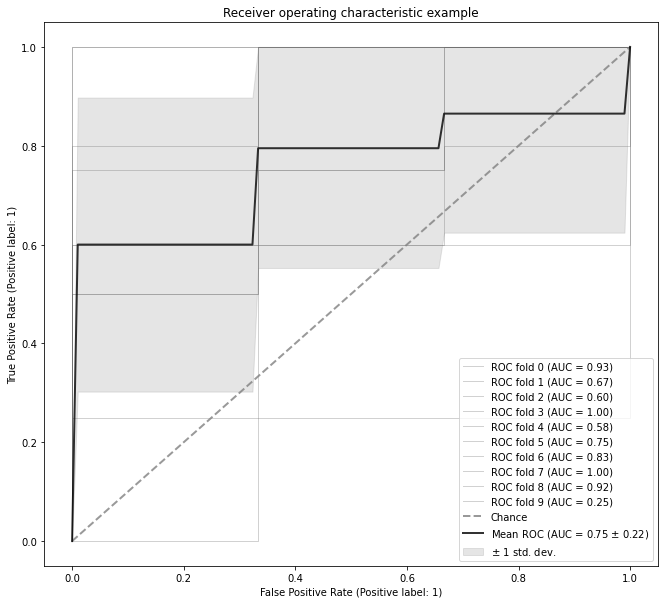

--------------------
______________stats___________________
PTGS2
Test normality:  5.899531061004382e-06 0.00016223439888563007
Patient:  4.161142890697675
Control:  2.744833824137931
Test homogenius: LeveneResult(statistic=14.232126708297745, pvalue=0.00033480280236238404)
Ttest_indResult(statistic=3.996144955819121, pvalue=0.00022765272786630082)


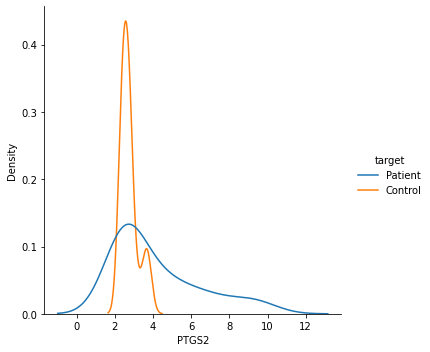

HLA-DQA1
Test normality:  5.0819588537365235e-09 0.8248356580734253
Patient:  10.836924941860467
Control:  11.286996827586206
MannwhitneyuResult(statistic=648.0, pvalue=0.7828836000135538)


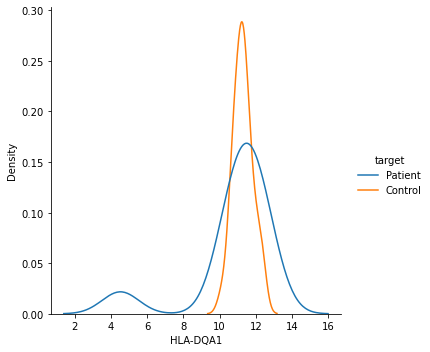

AHSP
Test normality:  5.245249790064577e-10 1.090724247032604e-10
Patient:  3.026015553488372
Control:  2.3279020689655177
Test homogenius: LeveneResult(statistic=4.897269767836356, pvalue=0.030161656838697513)
Ttest_indResult(statistic=2.6111643172754264, pvalue=0.011825115694178991)


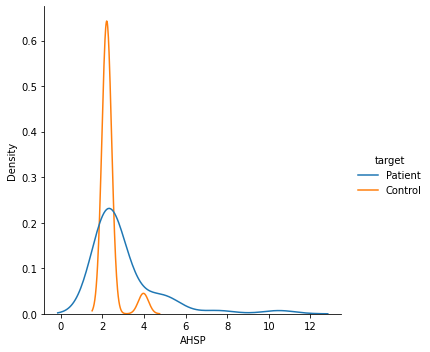

SOD2
Test normality:  1.6947915071341413e-08 1.2343526201163968e-09
Patient:  3.1554666348837213
Control:  2.520222527586207
Test homogenius: LeveneResult(statistic=4.5040599338064435, pvalue=0.03735437455499661)
Ttest_indResult(statistic=2.484842376642948, pvalue=0.015442383638392669)


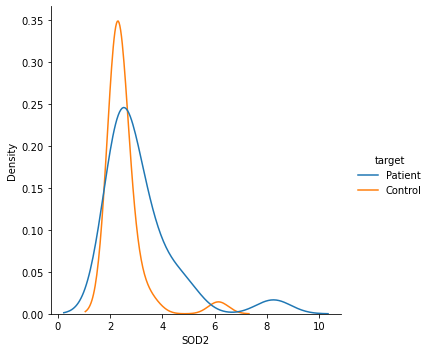

CXCL1
Test normality:  3.873722675962199e-07 1.2590813867063844e-06
Patient:  3.6546806558139537
Control:  2.7358510793103448
Test homogenius: LeveneResult(statistic=7.216459567031974, pvalue=0.009015585862760344)
Ttest_indResult(statistic=3.441423714926081, pvalue=0.0011317126678284037)


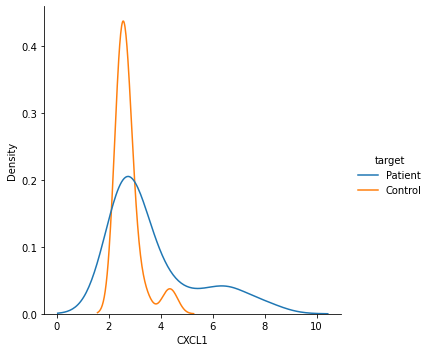

CFAP95
Test normality:  2.667516696419625e-08 1.4193899389169928e-08
Patient:  3.2541467674418607
Control:  2.5232283827586204
Test homogenius: LeveneResult(statistic=5.038099776717118, pvalue=0.02795845120110486)
Ttest_indResult(statistic=2.5694534186478677, pvalue=0.012622954496840949)


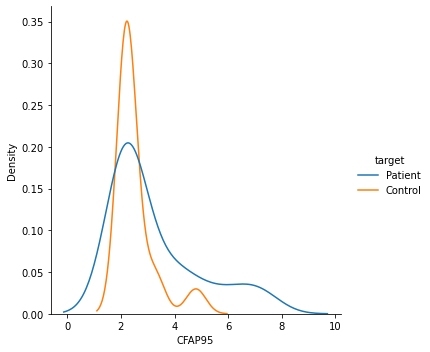

UTS2
Test normality:  6.014654552188858e-09 3.0152071417433035e-07
Patient:  3.72931871627907
Control:  3.1467354655172417
Test homogenius: LeveneResult(statistic=2.0698523574481515, pvalue=0.15469246761025893)
MannwhitneyuResult(statistic=582.0, pvalue=0.6368450317981521)


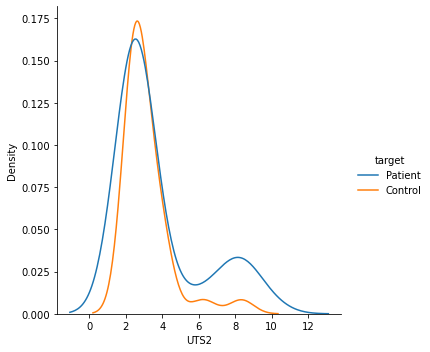

CA1
Test normality:  1.2271846649980489e-08 8.964827102886375e-09
Patient:  4.118318318604651
Control:  3.099963155172414
Test homogenius: LeveneResult(statistic=6.3646346466417905, pvalue=0.013916765979002025)
Ttest_indResult(statistic=2.864990667471029, pvalue=0.006076708674719251)


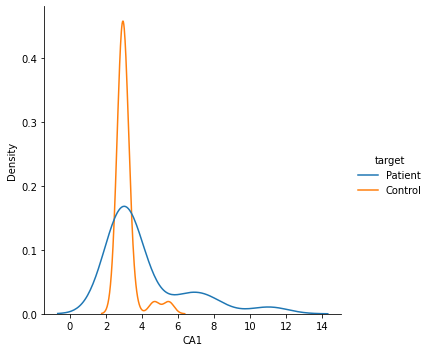

HLA-DRB4
Test normality:  4.913689735985827e-06 6.213836059032474e-06
Patient:  8.514368341860463
Control:  9.434406203448274
Test homogenius: LeveneResult(statistic=0.05688441763819462, pvalue=0.8121866281725385)
MannwhitneyuResult(statistic=571.0, pvalue=0.5503722600687388)


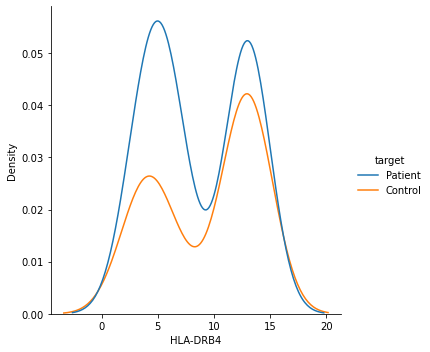

NEBL
Test normality:  2.7152747605896366e-08 5.460621821384848e-08
Patient:  3.975919220930232
Control:  3.076940293103448
Test homogenius: LeveneResult(statistic=2.9350254751889384, pvalue=0.09110331776956336)
MannwhitneyuResult(statistic=724.0, pvalue=0.18176898618072201)


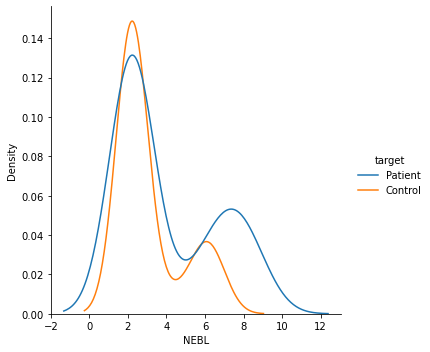

SCGB3A1
Test normality:  1.7721477618692916e-09 2.6066961709148018e-06
Patient:  3.991670786046512
Control:  4.1058293
Test homogenius: LeveneResult(statistic=0.10668370993632106, pvalue=0.7449263540509738)
MannwhitneyuResult(statistic=597.5, pvalue=0.7679535233468007)


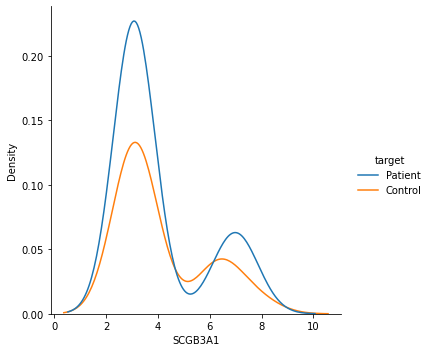

TACSTD2
Test normality:  9.493779771219124e-07 6.013198117216234e-07
Patient:  4.311210895348837
Control:  3.6142442586206904
Test homogenius: LeveneResult(statistic=2.0705446159445327, pvalue=0.15462450441318462)
MannwhitneyuResult(statistic=743.0, pvalue=0.16719845905293407)


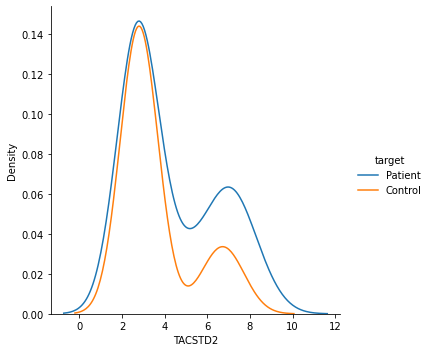

OLFM4
Test normality:  4.465479287318885e-05 0.003744271816685796
Patient:  4.613828069767441
Control:  4.431949179310345
Test homogenius: LeveneResult(statistic=0.3111726150064596, pvalue=0.5787412107124301)
MannwhitneyuResult(statistic=631.0, pvalue=0.9359147000136798)


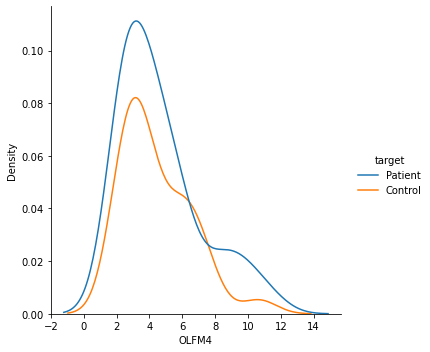

CRISP3
Test normality:  7.561491770502471e-07 3.633217886545026e-07
Patient:  4.125310316279069
Control:  3.244693386206897
Test homogenius: LeveneResult(statistic=3.138660041923393, pvalue=0.0808088814692685)
MannwhitneyuResult(statistic=710.5, pvalue=0.31629844424038145)


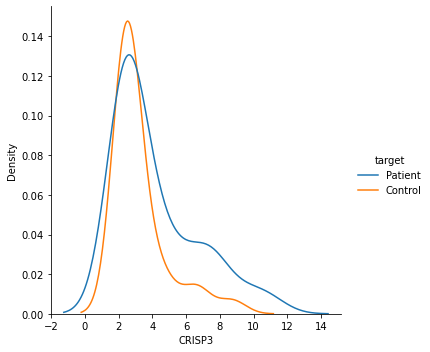

CXCL3
Test normality:  7.717673722318352e-12 2.1244925957342176e-11
Patient:  2.822515293023256
Control:  2.2841281137931033
Test homogenius: LeveneResult(statistic=2.8136381492203872, pvalue=0.0979264069026157)
MannwhitneyuResult(statistic=782.0, pvalue=0.030587337388590957)


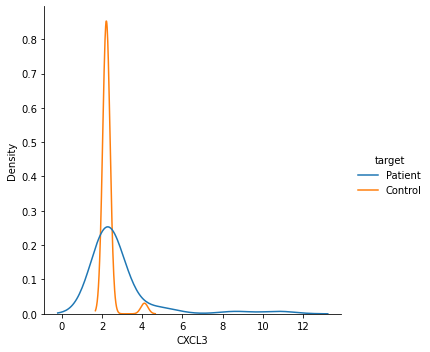

KRT1
Test normality:  2.1874591027426504e-08 9.512706355963019e-08
Patient:  3.1776881348837214
Control:  2.8158238068965513
Test homogenius: LeveneResult(statistic=1.1266743980563423, pvalue=0.29213430719773736)
MannwhitneyuResult(statistic=636.5, pvalue=0.8856059563087636)


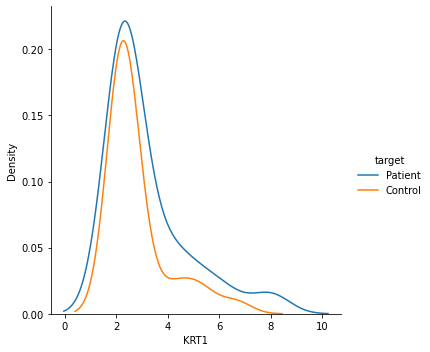

ZNF506
Test normality:  7.121767708895277e-08 8.994803124551254e-08
Patient:  3.436946974418605
Control:  3.205212899999999
Test homogenius: LeveneResult(statistic=0.45143276541683464, pvalue=0.5038668887240789)
MannwhitneyuResult(statistic=708.5, pvalue=0.3313180517592512)


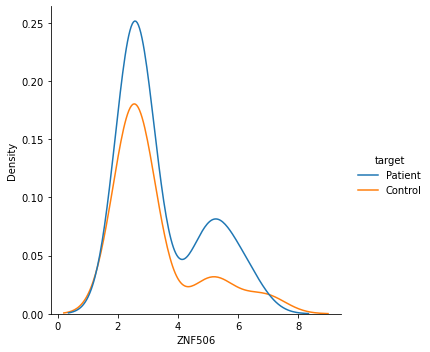

TMTC1
Test normality:  0.00023376352328341454 0.0002379660145379603
Patient:  4.195902281395349
Control:  4.028817689655172
Test homogenius: LeveneResult(statistic=0.3657460995950122, pvalue=0.5472876369556341)
MannwhitneyuResult(statistic=672.5, pvalue=0.5755194443635732)


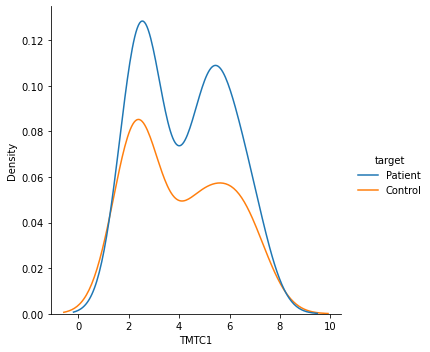

C17orf97
Test normality:  4.376194738142658e-06 7.421904592774808e-05
Patient:  3.825668588372093
Control:  3.9501728413793105
Test homogenius: LeveneResult(statistic=0.2101688642569174, pvalue=0.6480552399006563)
MannwhitneyuResult(statistic=618.0, pvalue=0.9540679117586526)


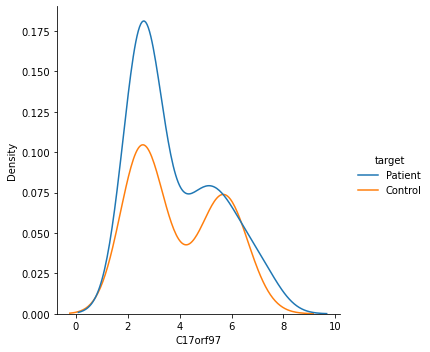

HLA-DRB1
Test normality:  1.2716438568816102e-08 1.752423031575745e-06
Patient:  4.850654418604651
Control:  5.215626893103448
Test homogenius: LeveneResult(statistic=0.18446295364881388, pvalue=0.668884698387818)
MannwhitneyuResult(statistic=586.0, pvalue=0.6624362539538944)


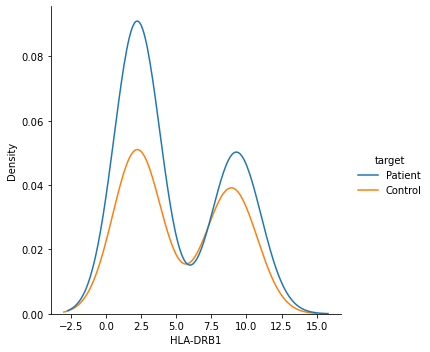

_______________________________________________
0                NAME     ALAS2      NEBL    CRISP3     PTGS2      MMP8  \
2   Schizo1_GSM677118  2.199321  2.199321  4.438188  5.744031  4.622682   
3   Schizo1_GSM677119  2.273582  6.667096  2.551511   6.66101   2.21288   
4   Schizo1_GSM677120  2.199321  2.199321  2.466505  9.078115   2.21288   
5   Schizo1_GSM677121  2.199321  2.199321  2.319901  3.975843  2.199783   
6   Schizo1_GSM677122  2.199321  2.199321   2.48846  4.389556   2.21288   
..                ...       ...       ...       ...       ...       ...   
69    Ctrl1_GSM677178  2.199321  2.199321  2.491589  2.674129  2.226878   
70    Ctrl1_GSM677179  2.199321  2.200186  2.319901  2.434396   2.21288   
71    Ctrl1_GSM677180  2.199321  5.867772  4.948936  2.315933  2.882588   
72    Ctrl1_GSM677181  2.199321  2.199321  2.319901  3.230043  2.199321   
73    Ctrl1_GSM677182  2.199321  2.199321   2.48846  2.315933   2.21288   

0      CXCL3     OLFM4  SELENBP1   CEACAM6      UTS

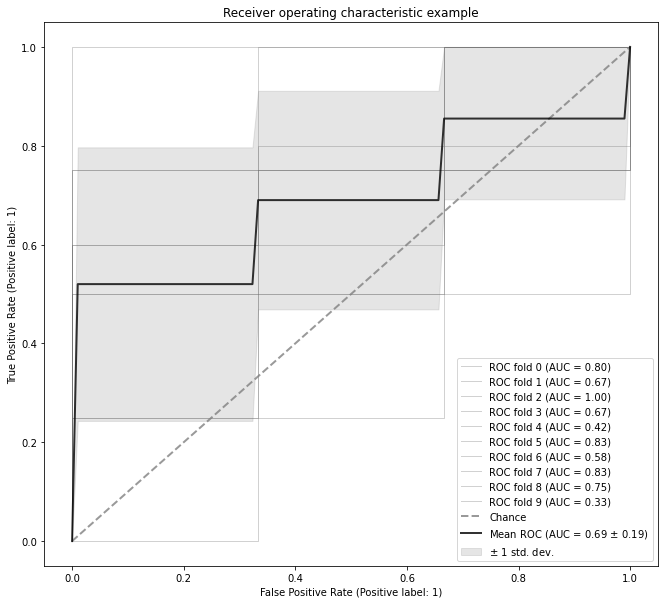

--------------------
______________stats___________________
PTGS2
Test normality:  5.899531061004382e-06 0.00016223439888563007
Patient:  4.161142890697675
Control:  2.744833824137931
Test homogenius: LeveneResult(statistic=14.232126708297745, pvalue=0.00033480280236238404)
Ttest_indResult(statistic=3.996144955819121, pvalue=0.00022765272786630082)


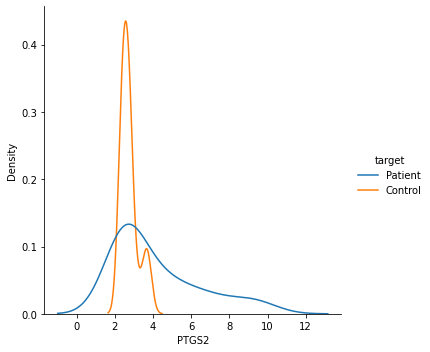

UTS2
Test normality:  6.014654552188858e-09 3.0152071417433035e-07
Patient:  3.72931871627907
Control:  3.1467354655172417
Test homogenius: LeveneResult(statistic=2.0698523574481515, pvalue=0.15469246761025893)
MannwhitneyuResult(statistic=582.0, pvalue=0.6368450317981521)


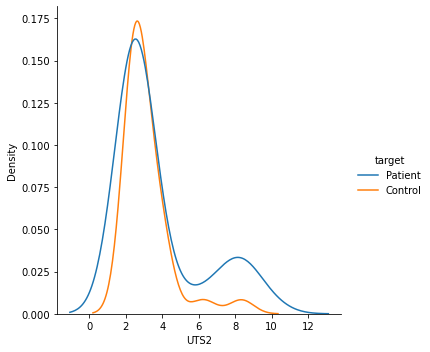

OLFM4
Test normality:  4.465479287318885e-05 0.003744271816685796
Patient:  4.613828069767441
Control:  4.431949179310345
Test homogenius: LeveneResult(statistic=0.3111726150064596, pvalue=0.5787412107124301)
MannwhitneyuResult(statistic=631.0, pvalue=0.9359147000136798)


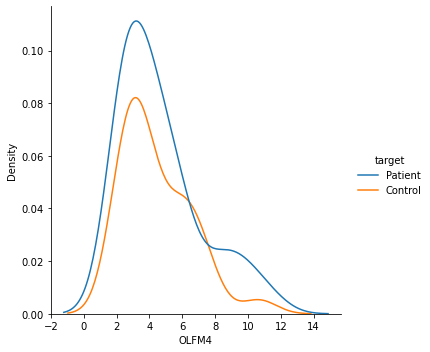

NEBL
Test normality:  2.7152747605896366e-08 5.460621821384848e-08
Patient:  3.975919220930232
Control:  3.076940293103448
Test homogenius: LeveneResult(statistic=2.9350254751889384, pvalue=0.09110331776956336)
MannwhitneyuResult(statistic=724.0, pvalue=0.18176898618072201)


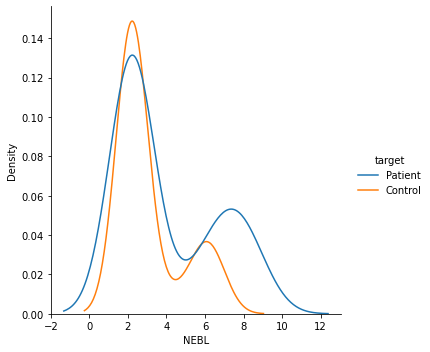

ALAS2
Test normality:  7.120990463960197e-10 7.989928163532056e-11
Patient:  3.477849002325581
Control:  2.420479482758621
Test homogenius: LeveneResult(statistic=4.78566824846765, pvalue=0.03203903030946762)
Ttest_indResult(statistic=2.5661618089261404, pvalue=0.01306402775608431)


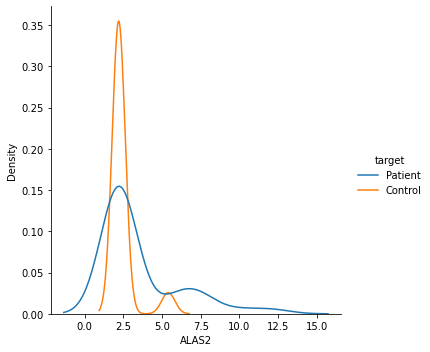

CRISP3
Test normality:  7.561491770502471e-07 3.633217886545026e-07
Patient:  4.125310316279069
Control:  3.244693386206897
Test homogenius: LeveneResult(statistic=3.138660041923393, pvalue=0.0808088814692685)
MannwhitneyuResult(statistic=710.5, pvalue=0.31629844424038145)


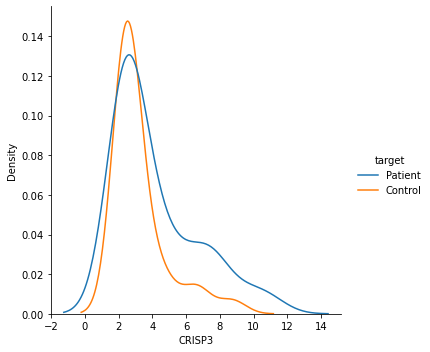

CXCL3
Test normality:  7.717673722318352e-12 2.1244925957342176e-11
Patient:  2.822515293023256
Control:  2.2841281137931033
Test homogenius: LeveneResult(statistic=2.8136381492203872, pvalue=0.0979264069026157)
MannwhitneyuResult(statistic=782.0, pvalue=0.030587337388590957)


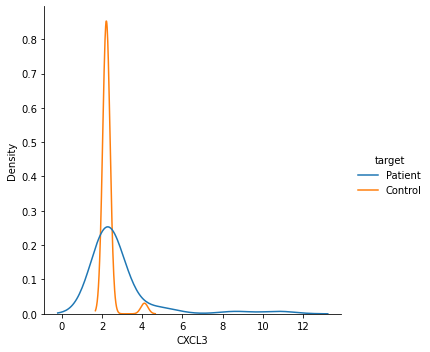

HLA-DQB1
Test normality:  1.1592238280400124e-07 2.3886843791842693e-06
Patient:  7.9691560883720935
Control:  7.995399313793104
Test homogenius: LeveneResult(statistic=0.0005223557583851457, pvalue=0.9818308793929453)
MannwhitneyuResult(statistic=624.5, pvalue=0.9954027137717366)


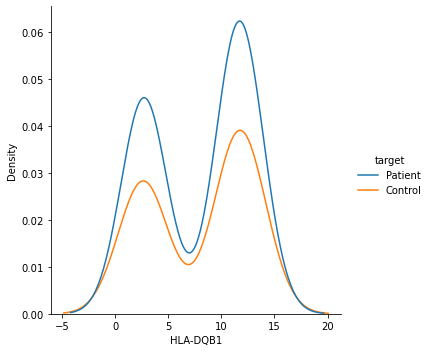

HLA-DRB1
Test normality:  1.2716438568816102e-08 1.752423031575745e-06
Patient:  4.850654418604651
Control:  5.215626893103448
Test homogenius: LeveneResult(statistic=0.18446295364881388, pvalue=0.668884698387818)
MannwhitneyuResult(statistic=586.0, pvalue=0.6624362539538944)


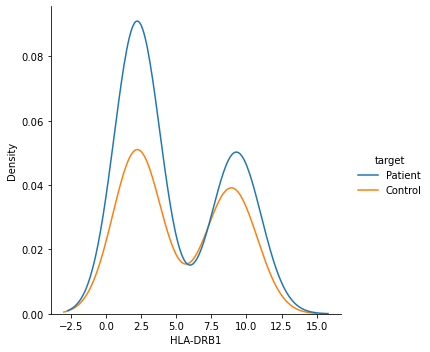

SELENBP1
Test normality:  6.579386341298843e-11 8.772524373590329e-11
Patient:  3.0405628046511626
Control:  2.363986720689655
Test homogenius: LeveneResult(statistic=3.134039823146246, pvalue=0.08102768707651149)
MannwhitneyuResult(statistic=723.5, pvalue=0.11644438487996732)


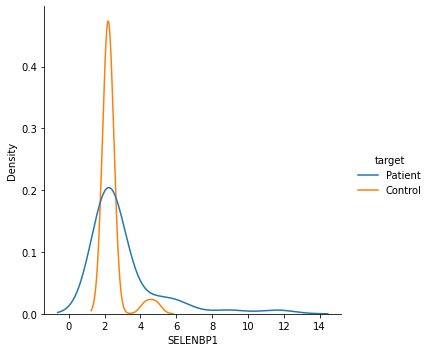

MMP8
Test normality:  1.6440164785080924e-09 1.1242471398276166e-09
Patient:  3.2565220581395344
Control:  2.662169348275863
Test homogenius: LeveneResult(statistic=2.0437914085523388, pvalue=0.15727635386036376)
MannwhitneyuResult(statistic=713.0, pvalue=0.26157562195103956)


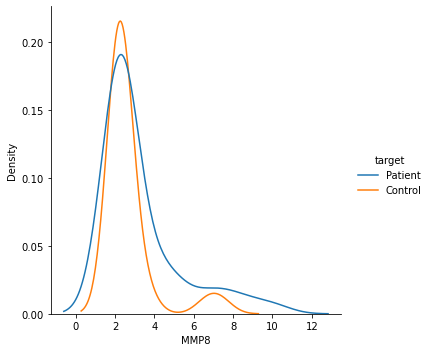

HLA-DQA1
Test normality:  8.917326965729444e-08 2.968296939798165e-06
Patient:  7.557942195348836
Control:  7.663220558620691
Test homogenius: LeveneResult(statistic=0.0010959203492206878, pvalue=0.9736853192333352)
MannwhitneyuResult(statistic=589.0, pvalue=0.6945417843556175)


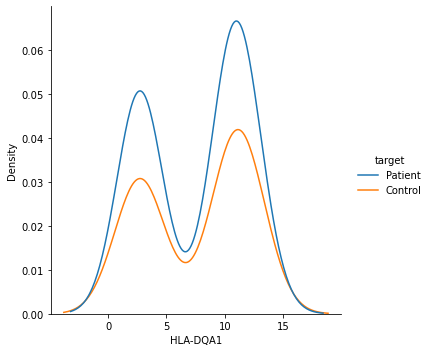

CEACAM6
Test normality:  3.3092522055966356e-09 6.32508886155847e-07
Patient:  3.1891395255813957
Control:  3.089232875862068
Test homogenius: LeveneResult(statistic=0.06007243893854405, pvalue=0.8070985946275765)
MannwhitneyuResult(statistic=657.5, pvalue=0.6908601027367322)


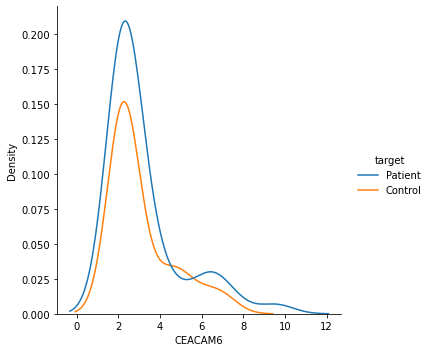

_______________________________________________
0                NAME     ALAS2      NEBL   HLA-DRB1
2   Schizo1_GSM677118  2.199321  2.199321   8.834626
3   Schizo1_GSM677119  2.273582  6.667096   9.950972
4   Schizo1_GSM677120  2.199321  2.199321   2.199321
5   Schizo1_GSM677121  2.199321  2.199321  10.883749
6   Schizo1_GSM677122  2.199321  2.199321   9.452332
..                ...       ...       ...        ...
69    Ctrl1_GSM677178  2.199321  2.199321   2.199321
70    Ctrl1_GSM677179  2.199321  2.200186   2.199321
71    Ctrl1_GSM677180  2.199321  5.867772   2.199321
72    Ctrl1_GSM677181  2.199321  2.199321   9.763999
73    Ctrl1_GSM677182  2.199321  2.199321   9.369147

[72 rows x 4 columns]
model_name xgb, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_b

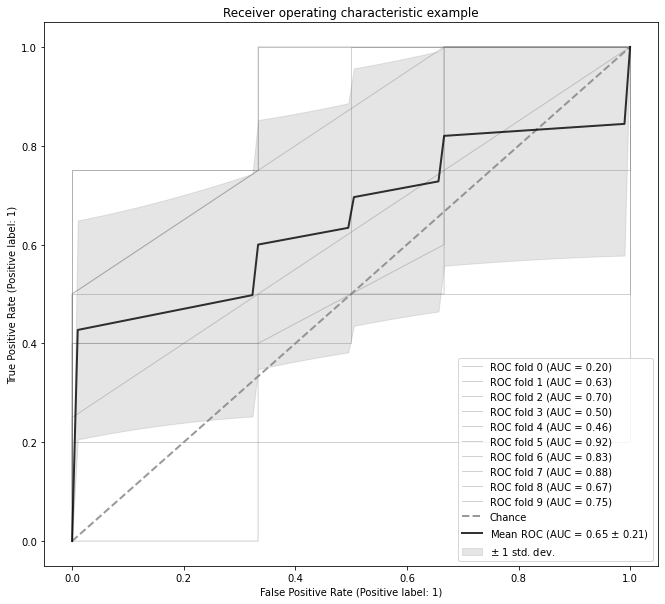

--------------------
______________stats___________________
NEBL
Test normality:  2.50515803656981e-08 2.5187908647694712e-08
Patient:  3.956255846511628
Control:  3.0275401517241374
Test homogenius: LeveneResult(statistic=3.1594065627660943, pvalue=0.07983435233153889)
MannwhitneyuResult(statistic=726.5, pvalue=0.16066964008881435)


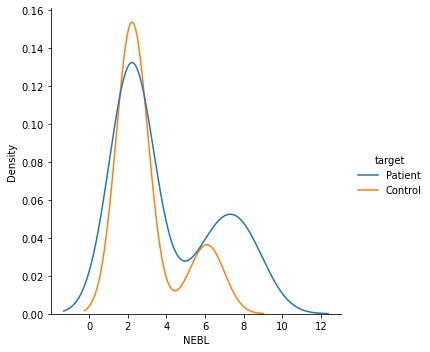

HLA-DRB1
Test normality:  1.2716438568816102e-08 1.752423031575745e-06
Patient:  4.850654418604651
Control:  5.215626893103448
Test homogenius: LeveneResult(statistic=0.18446295364881388, pvalue=0.668884698387818)
MannwhitneyuResult(statistic=586.0, pvalue=0.6624362539538944)


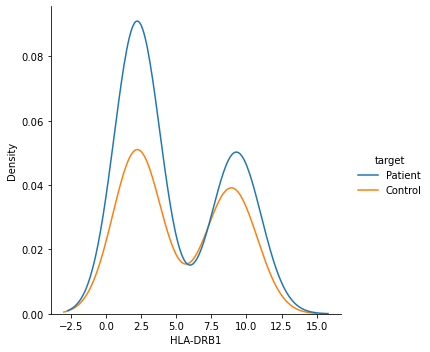

ALAS2
Test normality:  7.120990463960197e-10 7.989928163532056e-11
Patient:  3.477849002325581
Control:  2.420479482758621
Test homogenius: LeveneResult(statistic=4.78566824846765, pvalue=0.03203903030946762)
Ttest_indResult(statistic=2.5661618089261404, pvalue=0.01306402775608431)


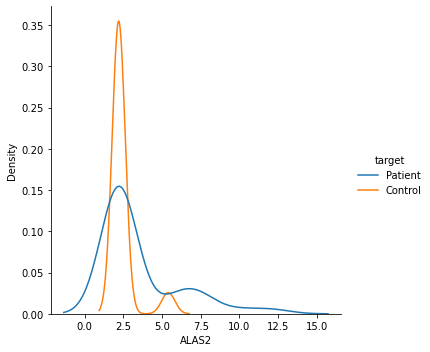

_______________________________________________
0                NAME      HTR4 ENSG00000254811     CRHBP      HTR6      HTR7  \
2   Schizo1_GSM677118  5.727914        2.199321  2.199321   3.49068  3.680865   
3   Schizo1_GSM677119  5.724901        2.270974  2.199321   3.49068  3.024656   
4   Schizo1_GSM677120  6.239469        2.199321  2.199321   3.49068  3.505588   
5   Schizo1_GSM677121  5.711125        2.199321  2.199321   3.48934  3.267655   
6   Schizo1_GSM677122  5.100501        2.199321  2.199321  3.564864  3.024656   
..                ...       ...             ...       ...       ...       ...   
69    Ctrl1_GSM677178  5.681799        2.199321  2.199321   3.49068  3.024656   
70    Ctrl1_GSM677179  5.730127        2.199321  2.199321   3.48934  3.024656   
71    Ctrl1_GSM677180  5.681799        2.199321  2.199321   3.49068  3.024656   
72    Ctrl1_GSM677181  5.707998        2.199321  2.199321  3.474379  3.024656   
73    Ctrl1_GSM677182  5.730127        2.199321  2.199321   3

ROC AUC 10 folds: 0.7866666666666666 +- 0.1577269088576131 std
Accuracy 10 folds: 0.725 +- 0.11299494299683123 std
F1 10 folds: 0.7071031746031745 +- 0.123833871486711 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=No

ROC AUC 10 folds: 0.7366666666666667 +- 0.20920484379350943 std
Accuracy 10 folds: 0.7232142857142856 +- 0.13152607020228782 std
F1 10 folds: 0.7178968253968253 +- 0.13730519423650184 std
__________________________________________________________________________
model_name svm, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model', SVC())])
ROC AUC 10 folds: 0.7450000000000001 +- 0.1906203323654408 std
Accuracy 10 folds: 0.7107142857142856 +- 0.12210943569484826 std
F1 10 folds: 0.7039285714285713 +- 0.12757445249620006 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model', R

ROC AUC 10 folds: 0.8066666666666666 +- 0.1943936441576444 std
Accuracy 10 folds: 0.7160714285714286 +- 0.20146941075356264 std
F1 10 folds: 0.7092857142857143 +- 0.20603694321715604 std
__________________________________________________________________________


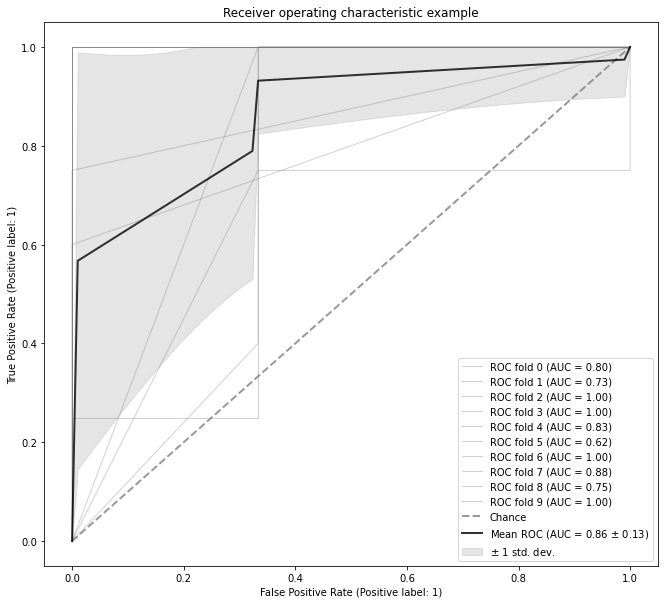

--------------------
______________stats___________________
RGS3
Test normality:  0.012755529955029488 0.4404343366622925
Patient:  9.096211441860467
Control:  9.45928670689655
MannwhitneyuResult(statistic=235.0, pvalue=8.397352048724973e-06)


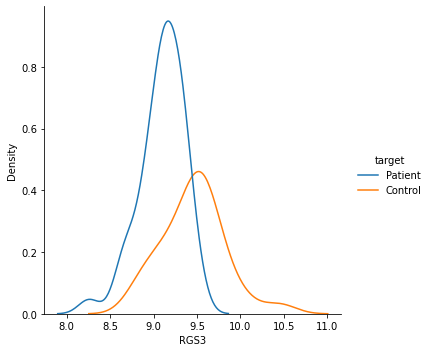

AASDHPPT
Test normality:  0.008612638339400291 0.6212313175201416
Patient:  10.783301546511627
Control:  10.943260241379308
MannwhitneyuResult(statistic=332.0, pvalue=0.0008344836213811745)


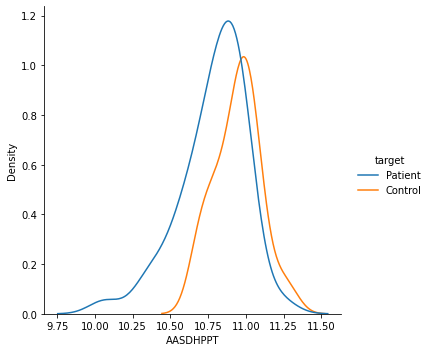

RCCD1
Test normality:  0.00013440912880469114 0.0035517127253115177
Patient:  6.4878325
Control:  6.578893789655171
Test homogenius: LeveneResult(statistic=0.4671461075430887, pvalue=0.4965592245399547)
MannwhitneyuResult(statistic=400.5, pvalue=0.01027402153777616)


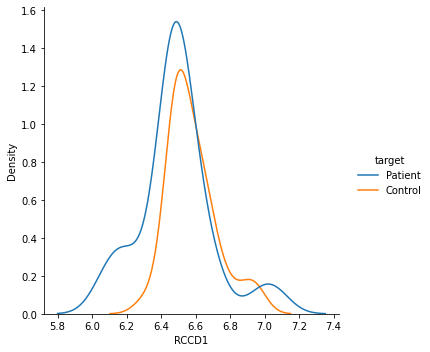

C12orf4
Test normality:  0.9168383479118347 0.26370522379875183
Patient:  8.425021027906979
Control:  8.476379724137932
MannwhitneyuResult(statistic=530.0, pvalue=0.2856229425084691)


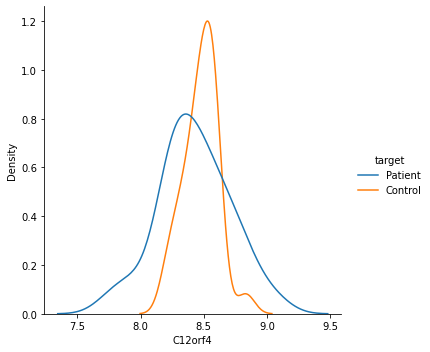

HTR4
Test normality:  0.0003698744694702327 0.0005007150466553867
Patient:  5.841379502325583
Control:  5.756584375862069
Test homogenius: LeveneResult(statistic=0.6280632338442631, pvalue=0.4307443628605586)
MannwhitneyuResult(statistic=757.5, pvalue=0.12397011044636783)


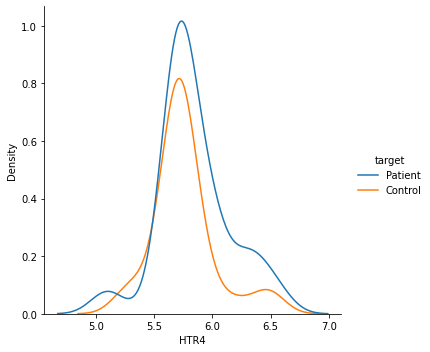

ENSG00000254811
Test normality:  1.8402805524570486e-14 1.3147570705751566e-11
Patient:  2.20098695116279
Control:  2.2047926896551724
Test homogenius: LeveneResult(statistic=0.5987025041220709, pvalue=0.44167887287447416)
MannwhitneyuResult(statistic=616.0, pvalue=0.7777104918733035)


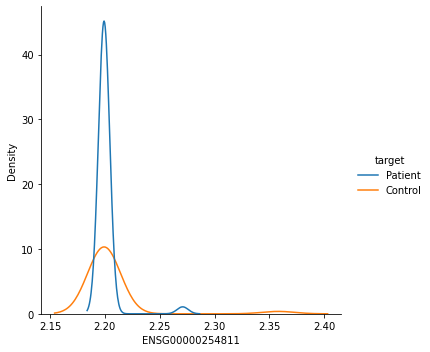

CRHBP
Test normality:  1.0 1.0
Patient:  2.1993205999999996
Control:  2.1993206
MannwhitneyuResult(statistic=623.5, pvalue=1.0)


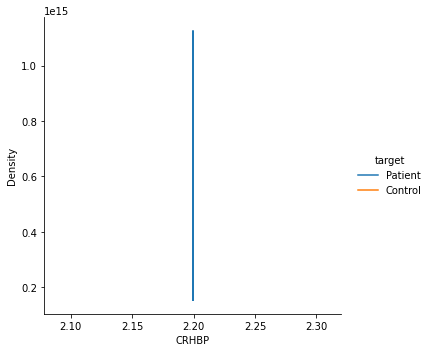

HTR6
Test normality:  6.478997338632553e-10 7.289894798923058e-10
Patient:  3.5312445139534883
Control:  3.487455065517241
Test homogenius: LeveneResult(statistic=2.65455398313642, pvalue=0.10774612050590285)
MannwhitneyuResult(statistic=793.0, pvalue=0.023972863915390528)


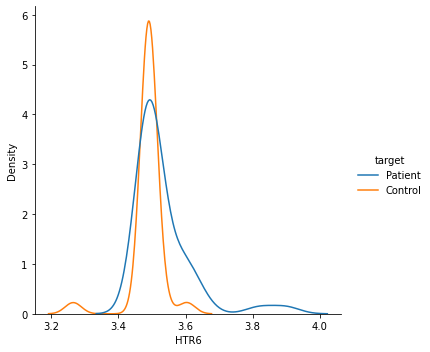

RNF227
Test normality:  0.7565479278564453 0.034815359860658646
Patient:  5.022712909302325
Control:  5.396576644827587
MannwhitneyuResult(statistic=262.0, pvalue=3.318385877680243e-05)


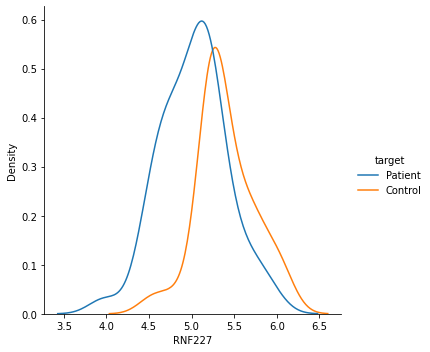

TSTD2
Test normality:  0.012444516643881798 0.6461266875267029
Patient:  7.982990393023256
Control:  8.244464413793104
MannwhitneyuResult(statistic=229.0, pvalue=6.077265350926953e-06)


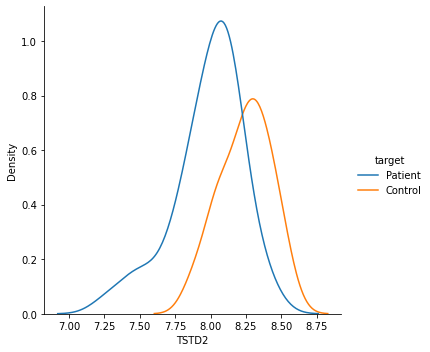

ATF6B
Test normality:  0.025920545682311058 0.5696540474891663
Patient:  4.963267941860465
Control:  4.910015379310344
MannwhitneyuResult(statistic=651.0, pvalue=0.7562296948873091)


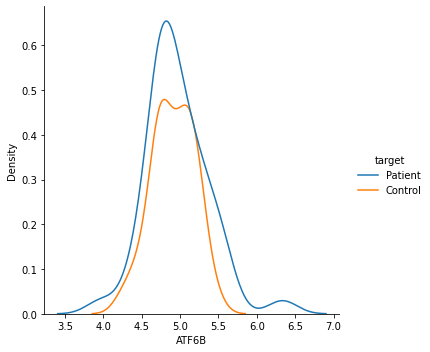

PRMT9
Test normality:  0.26375964283943176 0.026491984724998474
Patient:  7.2023160162790685
Control:  7.381508789655173
MannwhitneyuResult(statistic=276.0, pvalue=6.665933908930659e-05)


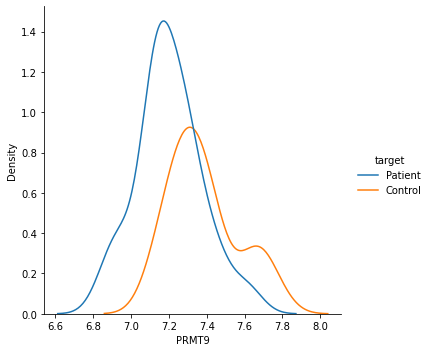

CIAO2B
Test normality:  0.1683509349822998 0.05514176934957504
Patient:  10.610975430232557
Control:  10.67210981034483
MannwhitneyuResult(statistic=446.0, pvalue=0.04213209390327233)


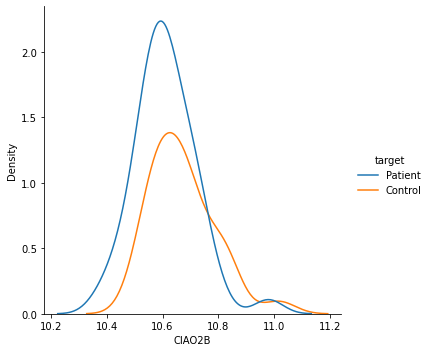

TMEM177
Test normality:  0.6544045209884644 0.7195218801498413
Patient:  5.8830980139534885
Control:  6.156888410344827
MannwhitneyuResult(statistic=309.5, pvalue=0.00031884674253795123)


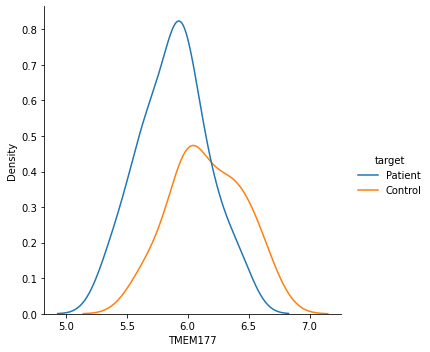

ETFDH
Test normality:  0.6433789730072021 0.024934688583016396
Patient:  7.39387956976744
Control:  7.381796948275861
MannwhitneyuResult(statistic=619.5, pvalue=0.9679221706862131)


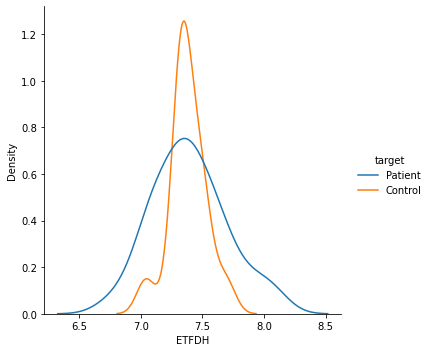

HTR7
Test normality:  4.9321000616942e-09 6.748707814807631e-09
Patient:  3.121247890697674
Control:  3.0526800103448286
Test homogenius: LeveneResult(statistic=3.332840113733352, pvalue=0.07217509406437482)
MannwhitneyuResult(statistic=708.0, pvalue=0.2768925150857866)


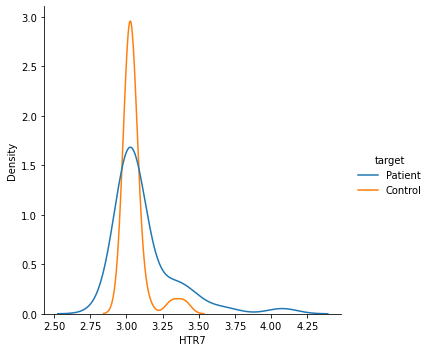

LURAP1L
Test normality:  1.859765867782276e-14 8.292766473516622e-10
Patient:  2.2036722697674413
Control:  2.201917782758621
Test homogenius: LeveneResult(statistic=0.10474418913462762, pvalue=0.7471739922656796)
MannwhitneyuResult(statistic=504.0, pvalue=0.01740768486409999)


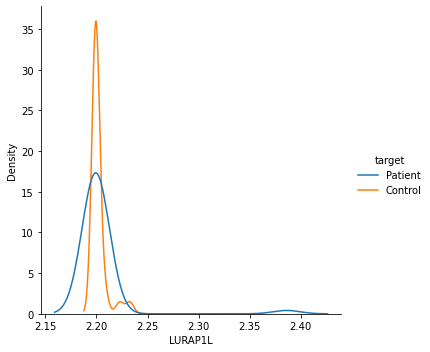

BBX
Test normality:  0.051688119769096375 0.09270226210355759
Patient:  11.03654473255814
Control:  11.22227653448276
MannwhitneyuResult(statistic=438.0, pvalue=0.03366475290332517)


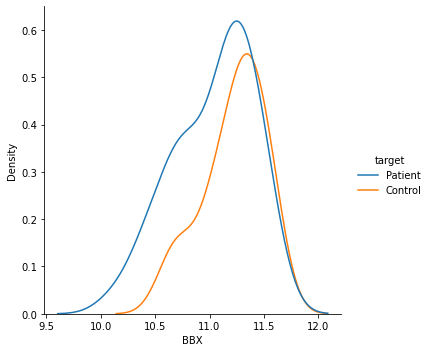

EXOC3-AS1
Test normality:  1.2442331353668123e-05 1.058707994161523e-06
Patient:  2.842635881395349
Control:  2.830882375862069
Test homogenius: LeveneResult(statistic=0.26363877990214885, pvalue=0.6092480914769928)
MannwhitneyuResult(statistic=694.5, pvalue=0.4103193398154068)


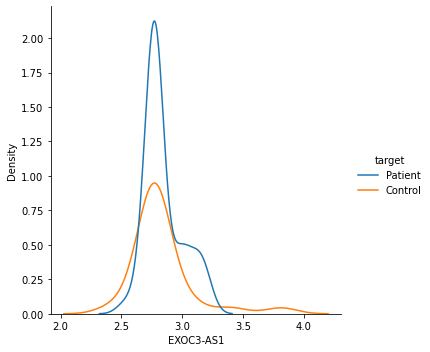

GSTK1
Test normality:  0.7068576216697693 0.2737899124622345
Patient:  12.34447003488372
Control:  12.367347137931036
MannwhitneyuResult(statistic=575.0, pvalue=0.5815592169901569)


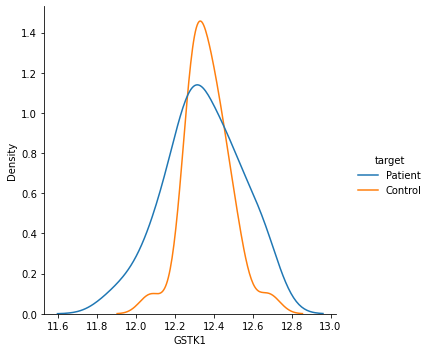

_______________________________________________
0                NAME       HTR4 ENSG00000254811     CRHBP       HTR6  \
2   Schizo1_GSM677118   42.90072        3.998259   4.89931   8.811475   
3   Schizo1_GSM677119   38.02423         5.82533   6.84099  12.052094   
4   Schizo1_GSM677120  32.416588        7.640915   1.13498  12.170444   
5   Schizo1_GSM677121   29.01379        6.818177  3.389925  14.025877   
6   Schizo1_GSM677122  25.509504        5.588978  1.841523  40.891663   
..                ...        ...             ...       ...        ...   
69    Ctrl1_GSM677178   47.29646         1.32089  3.235316  25.893131   
70    Ctrl1_GSM677179  30.163712        7.345832  11.81198  14.850256   
71    Ctrl1_GSM677180  23.966513        7.119162  4.614399   5.185866   
72    Ctrl1_GSM677181  23.756575        4.735561  1.098912  19.994974   
73    Ctrl1_GSM677182  35.654846        4.628796  4.772972    3.37097   

0        HTR7    LURAP1L        BBX  EXOC3-AS1      GSTK1  ...     ZNF181  

ROC AUC 10 folds: 0.7533333333333334 +- 0.1722078847078599 std
Accuracy 10 folds: 0.7392857142857142 +- 0.13557323497215934 std
F1 10 folds: 0.6813888888888888 +- 0.1680775926781849 std
__________________________________________________________________________
model_name xgb, feature_selection_method SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                 random_state=42),
                max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=8,
                                                                  random_state=42),
                                 max_features=72)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stop

ROC AUC 10 folds: 0.6816666666666668 +- 0.12189476335484364 std
Accuracy 10 folds: 0.6517857142857142 +- 0.15996850774257962 std
F1 10 folds: 0.6381746031746032 +- 0.15969555628729562 std
__________________________________________________________________________
model_name svm, feature_selection_method SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=72)
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=42),
                                 max_features=72)),
                ('model', SVC())])
ROC AUC 10 folds: 0.68 +- 0.1601735170231195 std
Accuracy 10 folds: 0.6946428571428571 +- 0.17649687804373107 std
F1 10 folds: 0.6849206349206349 +- 0.1777478361974196 std
__________________________________________________________________________
model_name rf, feature_selection_method SelectKBest(k='all')
Pipeline(steps=[('feature_selection', SelectKBest(k='all')),
                ('model', RandomForestClas

ROC AUC 10 folds: 0.7283333333333333 +- 0.1271591304014165 std
Accuracy 10 folds: 0.6517857142857142 +- 0.13201006841625873 std
F1 10 folds: 0.6376587301587302 +- 0.13017632599800985 std
__________________________________________________________________________


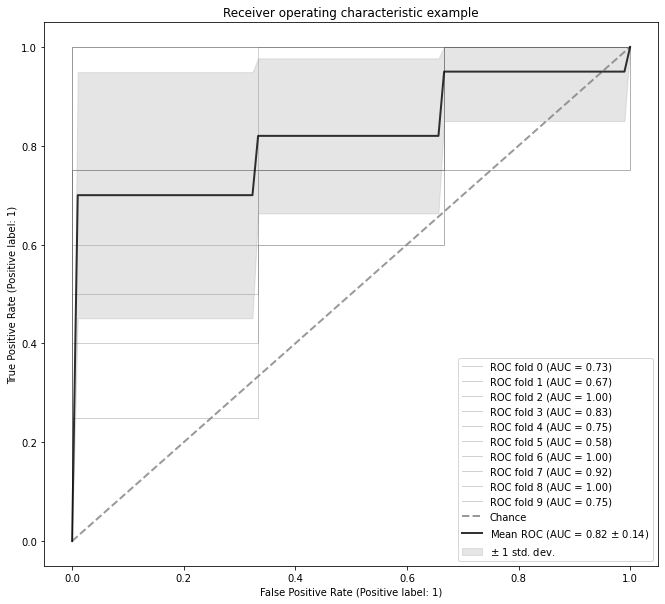

--------------------
______________stats___________________
_______________________________________________


In [6]:
results_dict_metrics ={}
results_dict_f1 ={}
for file in files[1:]:
    X,y =prepare_dataset(file)
    best_result,best_f1 =run(X,y, experiment_name=file.stem, repeats =10, topN=1,scaling=False)
    results_dict_f1[file.stem] =best_f1
    results_dict_metrics[file.stem] =best_result